In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
pd.read_csv(os.path.join('statistics', 'ds-wikitext-2-model-GRU-l-1-h-90-d-0.0-k-3-bptt-32.csv'))

Unnamed: 0    Bleu_1    Bleu_2    Bleu_3    Bleu_4  CIDEr    METEOR  \
0            0  0.917156  0.912324  0.910174  0.908932    0.0  0.683480   
1            1  0.925947  0.917478  0.913686  0.911494    0.0  0.666359   
2            2  0.926839  0.917946  0.913815  0.911389    0.0  0.666398   
3            3  0.925897  0.917235  0.913148  0.910665    0.0  0.667219   
4            4  0.927507  0.918533  0.914477  0.911961    0.0  0.667485   
5            5  0.925988  0.917645  0.913875  0.911553    0.0  0.669214   
6            6  0.928334  0.919598  0.915722  0.913348    0.0  0.668215   
7            7  0.927773  0.919167  0.915260  0.912831    0.0  0.667712   
8            8  0.929110  0.919860  0.915661  0.913104    0.0  0.667236   
9            9  0.927032  0.918274  0.914356  0.911982    0.0  0.667552   
10          10  0.928139  0.919107  0.915027  0.912520    0.0  0.669143   

     ROUGE_L  val_loss  
0   0.954579  0.377905  
1   0.953019  0.349392  
2   0.952434  0.307729  
3   0.952131  0.310219  
4   0.952217  0.278079  
5   0.952078  0.275692  
6   0.952880  0.274502  
7   0.952489  0.273195  
8   0.952664  0.272928  
9   0.951922  0.271747  
10  0.953095       NaN

In [3]:
!ls statistics

ds-wikitext-2-model-GRU-l-1-h-150-d-0.01-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-150-d-0.05-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-150-d-0.0-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-150-d-0.1-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-200-d-0.001-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-200-d-0.005-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-200-d-0.01-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-200-d-0.05-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-200-d-0.0-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-200-d-0.1-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-60-d-0.001-k-3-bptt-8.csv
ds-wikitext-2-model-GRU-l-1-h-60-d-0.01-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-60-d-0.05-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-60-d-0.0-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-60-d-0.1-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-90-d-0.01-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-90-d-0.05-k-3-bptt-32.csv
ds-wikitext-2-model-GRU-l-1-h-90-d-0.0-k-3

In [76]:
def select_data(directory, datasets, models, layers, hiddens, dropouts, ks, embeds, bptts, shortlists=None):
    for dataset, model, layer, hidden, dropout, k, embed, bptt, shortlist in itertools.product(datasets, models, layers, hiddens, dropouts, ks, embeds, bptts, shortlists or ['-1']):
        filename = 'ds-{}-model-{}-l-{}-h-{}-d-{}-k-{}-em-{}-bptt-{}{}.csv'.format(dataset,
                                                                                   model,
                                                                                   layer,
                                                                                   hidden,
                                                                                   dropout,
                                                                                   k,
                                                                                   embed,
                                                                                   bptt,
                                                                                   '-shortlist-{}'.format(shortlist) if shortlists is not None else '')
        dataframe = pd.read_csv(os.path.join(directory, filename))
        validation_statistics = dataframe.iloc[:-1]
        test_statistics = dataframe.iloc[-1]
        
        yield dataset, model, layer, hidden, dropout, k, embed, bptt, shortlist, validation_statistics, test_statistics

In [77]:
data_generator = select_data('statistics', ['wikitext-2'], ['GRU', 'LSTM'], ['1', '2'], ['60', '90', '150'], ['0.0'], ['3'], ['32'], ['0'])

In [108]:
def select_control(model, layer, hidden, dropout, k, bptt, embed, shortlist, control):
    return {
        'model': model,
        'layer': layer,
        'hidden': hidden,
        'dropout': dropout,
        'embed': embed,
        'shortlist': shortlist,
        'k': k
    }[control]

def plot_datasets(data_generator, control, title):
    fig, ax = plt.subplots(nrows=2, ncols=4)
    ax = ax.flatten()
    for dataset, model, layer, hidden, dropout, k, embed, bptt, shortlist, validation_statistics, test_statistics in data_generator:
        control_var = select_control(model, layer, hidden, dropout, k, bptt, embed, shortlist, control)
        ax[0].plot(validation_statistics['Bleu_1'], label="{} {}".format(control, control_var))
        ax[0].set_title('BLEU 1')
        ax[1].plot(validation_statistics['Bleu_2'], label="{} {}".format(control, control_var))
        ax[1].set_title('BLEU 2')
        ax[2].plot(validation_statistics['Bleu_3'], label="{} {}".format(control, control_var))
        ax[2].set_title('BLEU 3')
        ax[3].plot(validation_statistics['Bleu_4'], label="{} {}".format(control, control_var))
        ax[3].set_title('BLEU 4')
        ax[4].plot(validation_statistics['METEOR'], label="{} {}".format(control, control_var))
        ax[4].set_title('METEOR')
        ax[5].plot(validation_statistics['ROUGE_L'], label="{} {}".format(control, control_var))
        ax[5].set_title('ROUGE')
        ax[6].plot(validation_statistics['ppl'], label="{} {}".format(control, control_var))
        ax[6].set_title('Perplexity')
        ax[7].plot(validation_statistics['accuracy'], label="{} {}".format(control, control_var))
        ax[7].set_title('Accuracy')
    handles, labels = ax[6].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.suptitle(title)
    
    return fig

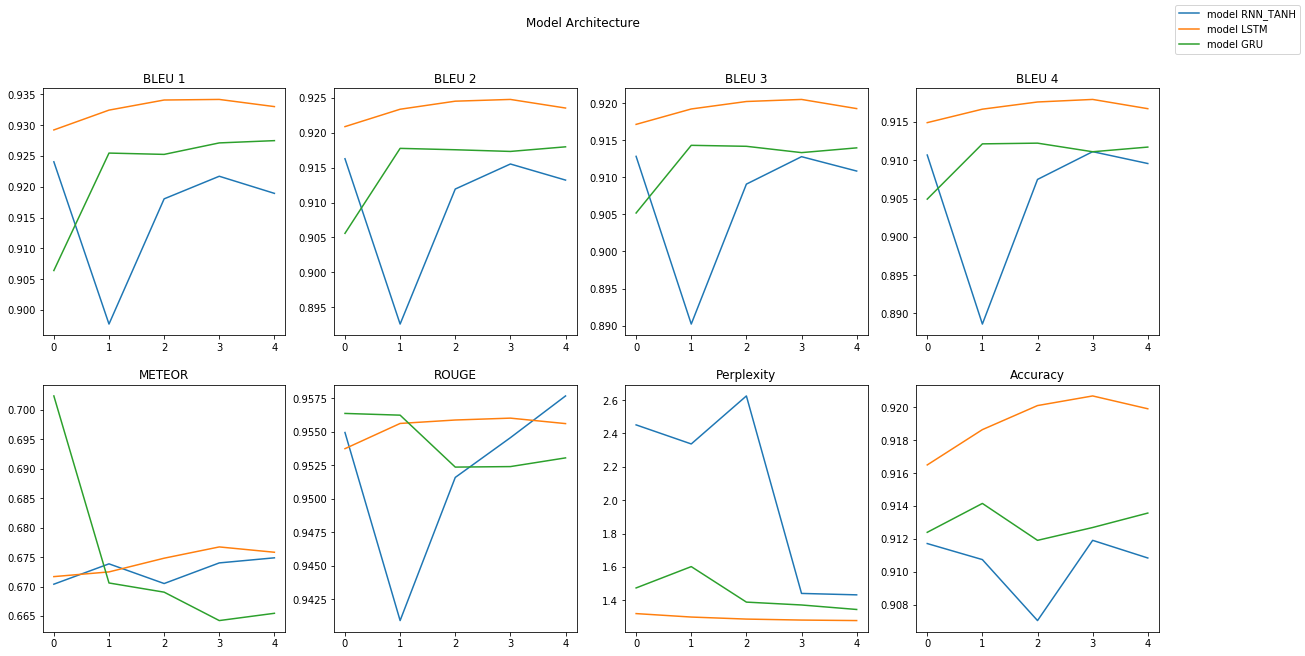

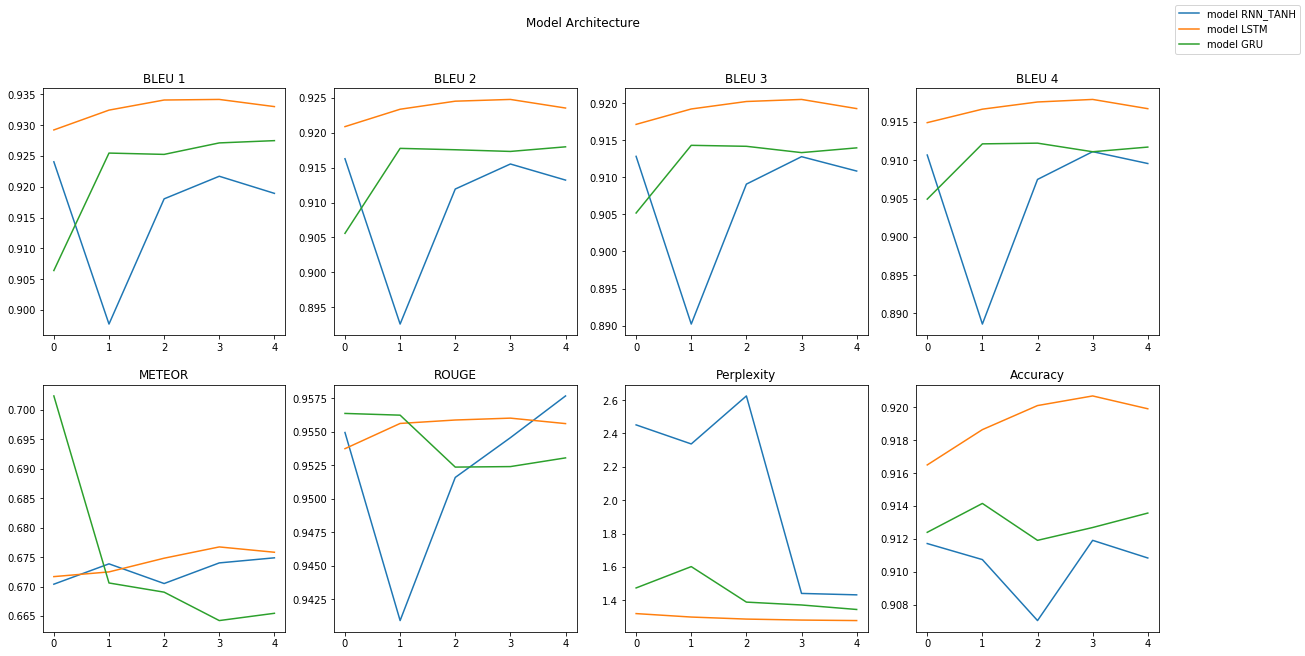

In [110]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['RNN_TANH', 'LSTM', 'GRU'], ['2'], ['200'], ['0.0'], ['3'], ['0'], ['32']),
              control='model',
              title='Model Architecture')

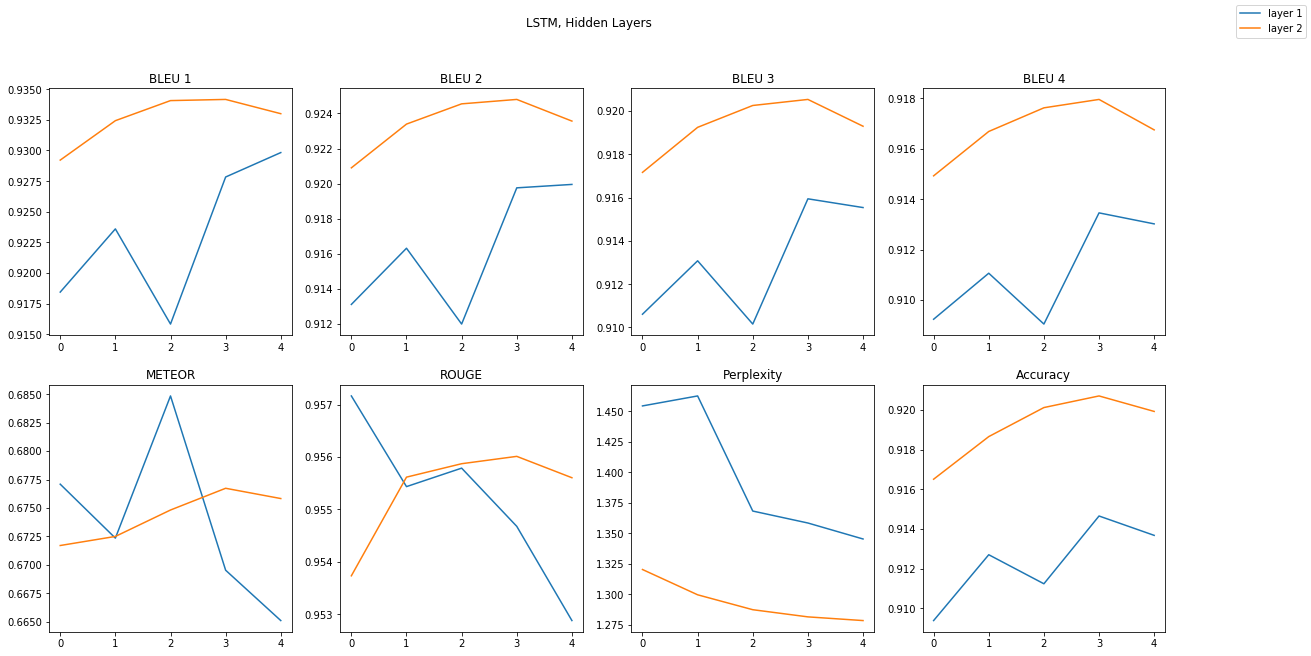

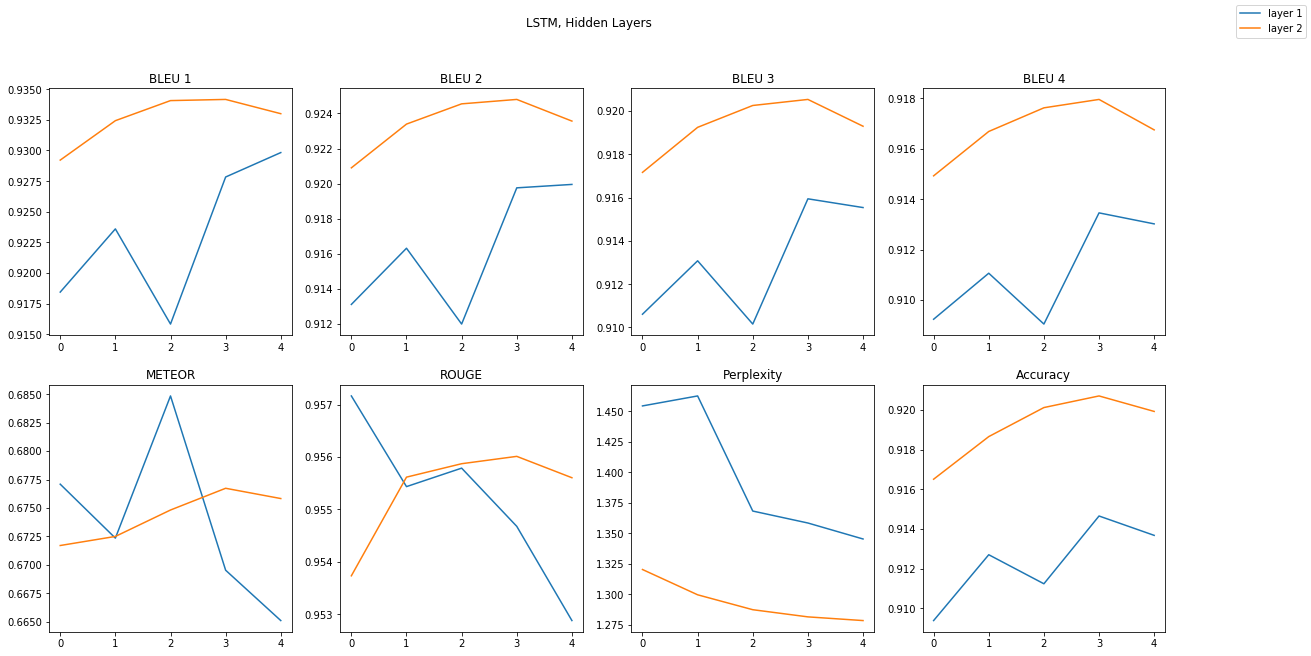

In [111]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['LSTM'], ['1', '2'], ['200'], ['0.0'], ['3'], ['0'], ['32']),
              control='layer',
              title='LSTM, Hidden Layers')

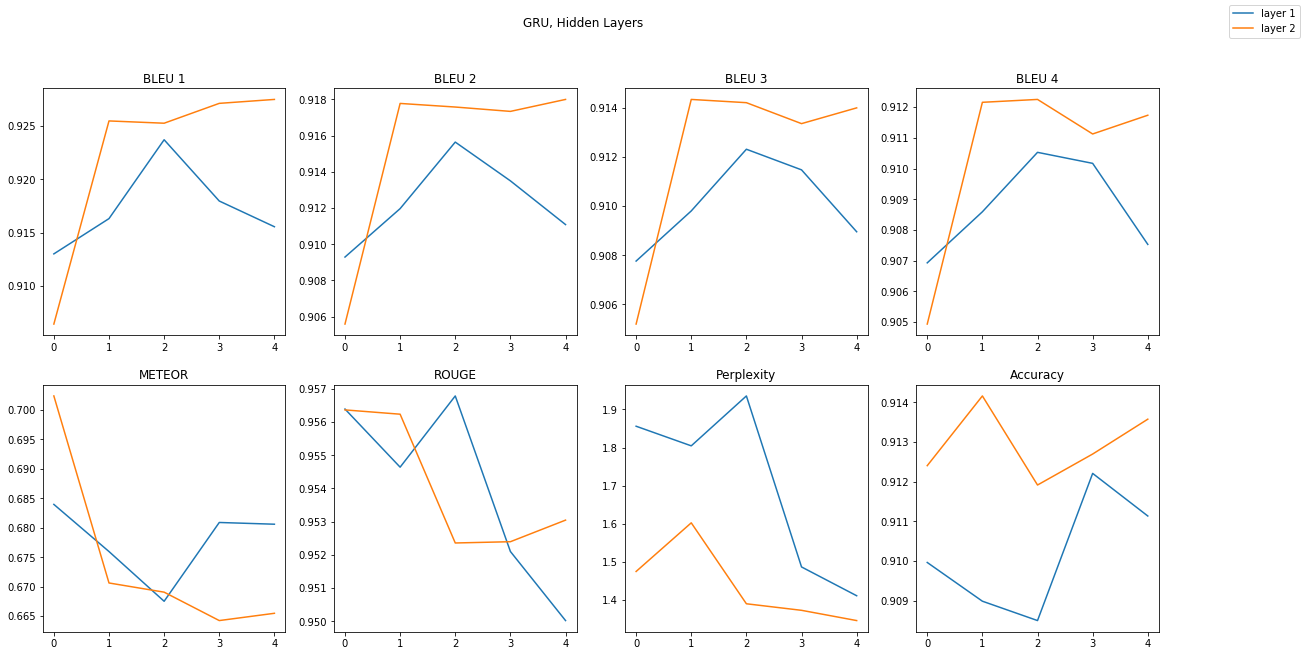

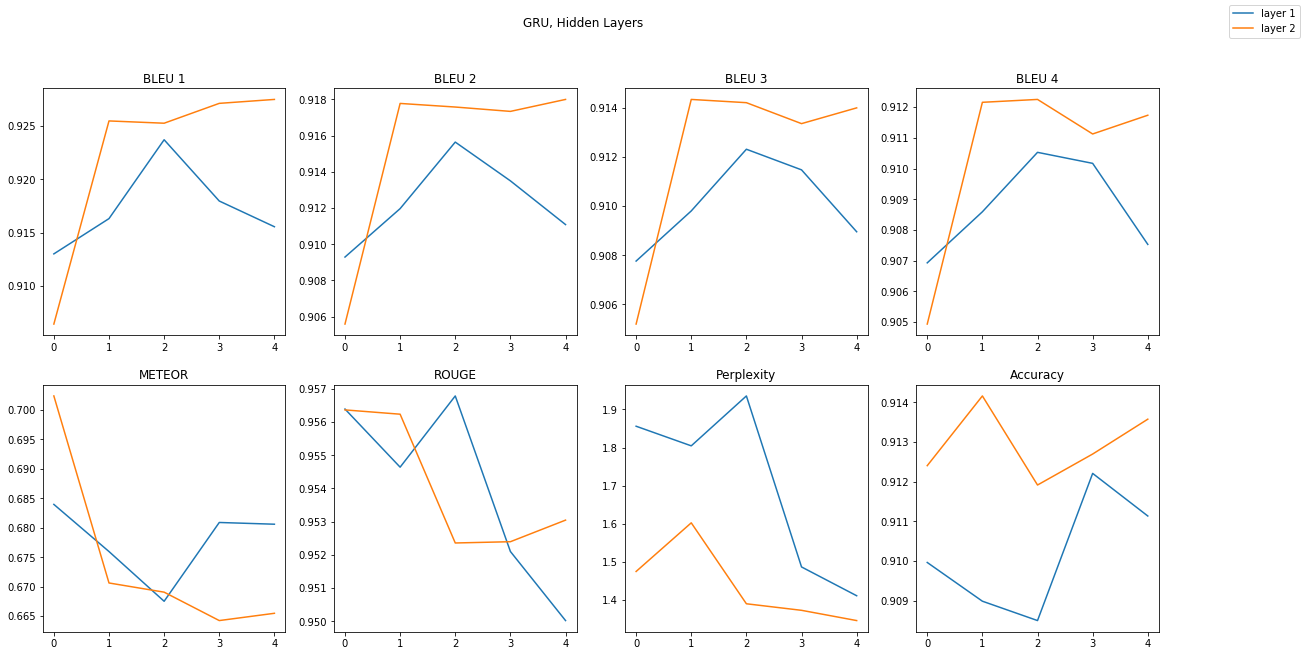

In [112]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['GRU'], ['1', '2'], ['200'], ['0.0'], ['3'], ['0'], ['32']),
              control='layer',
              title='GRU, Hidden Layers')

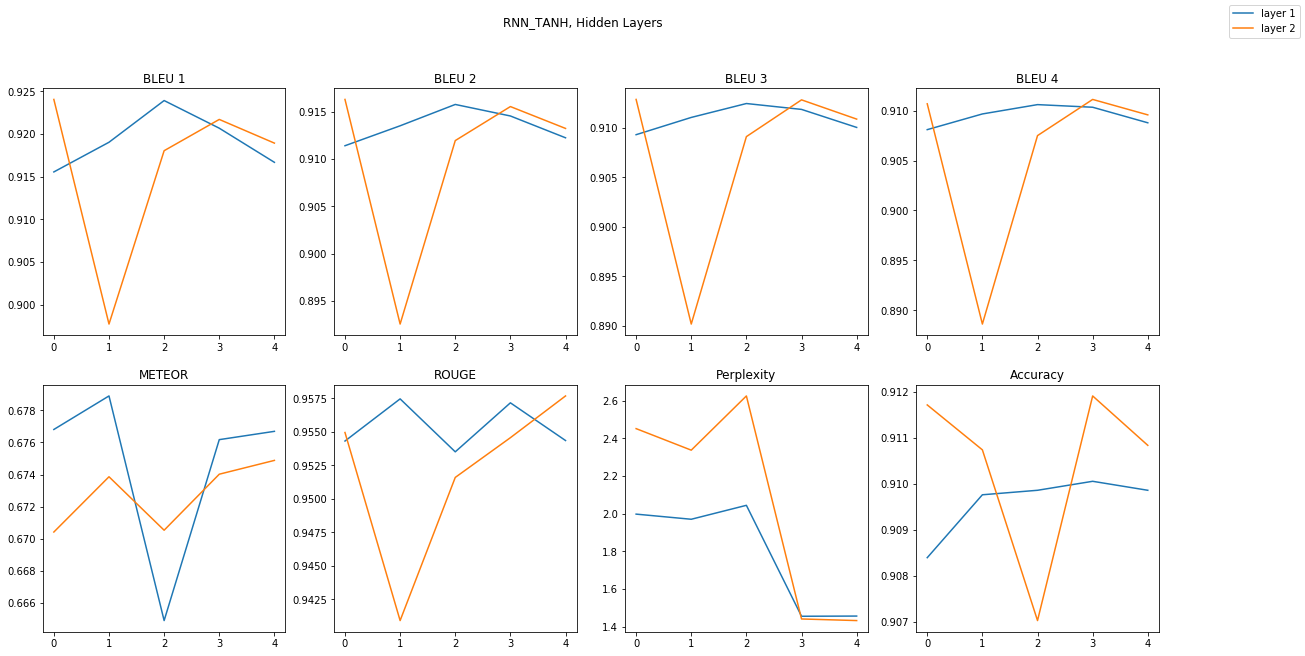

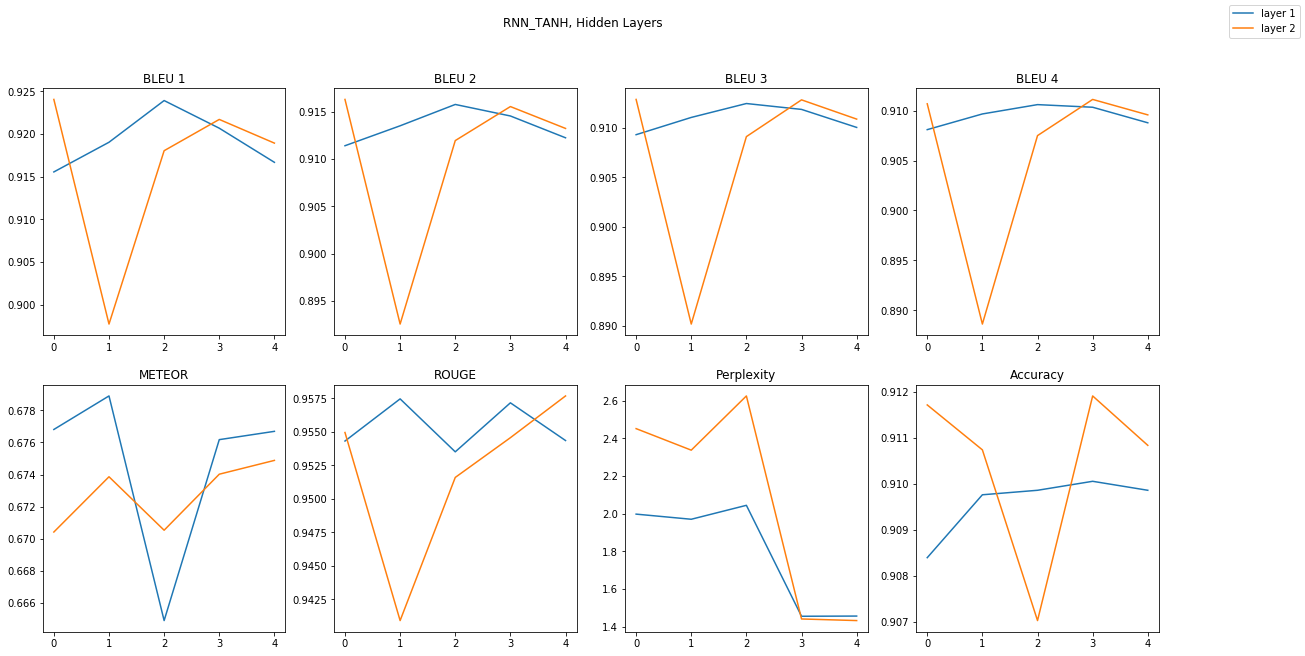

In [113]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['RNN_TANH'], ['1', '2'], ['200'], ['0.0'], ['3'], ['0'], ['32']),
              control='layer',
              title='RNN_TANH, Hidden Layers')

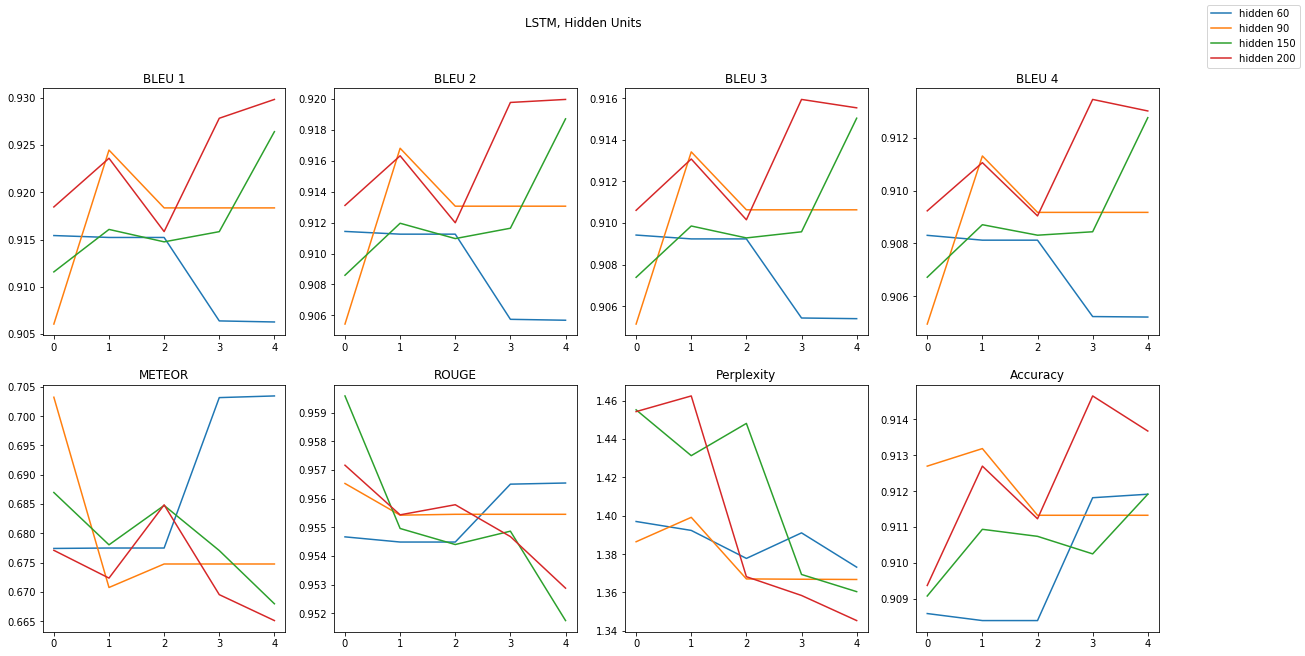

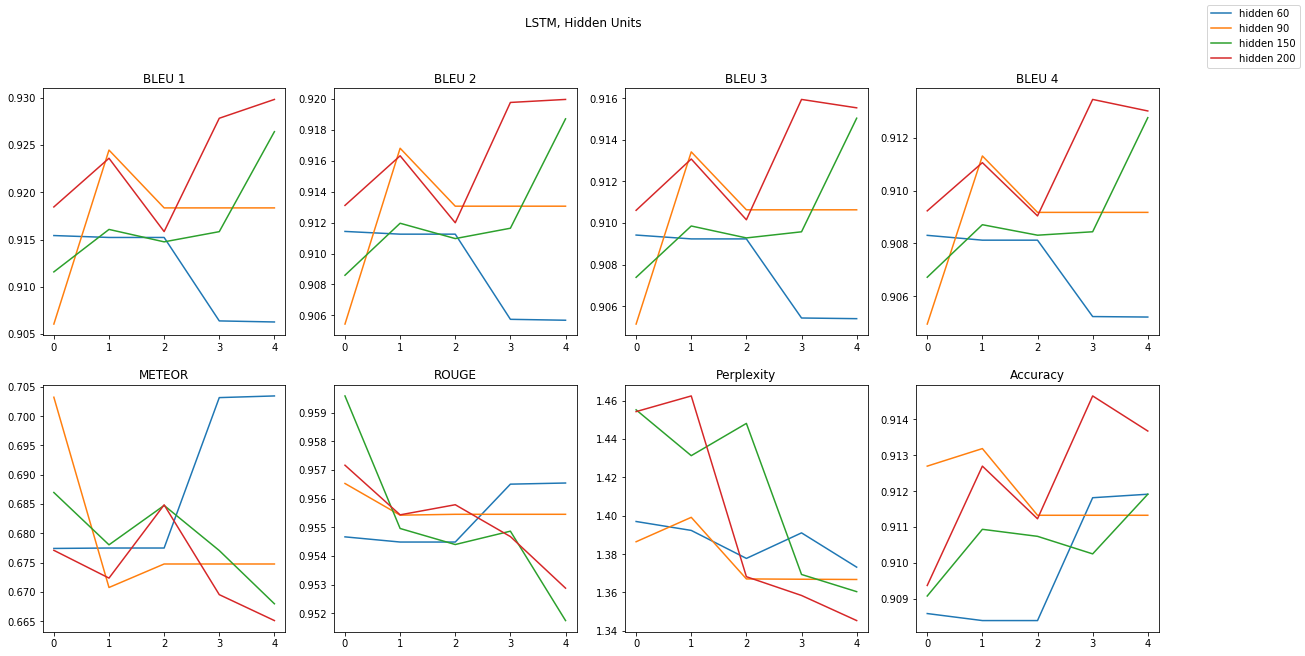

In [114]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['LSTM'], ['1'], ['60', '90', '150', '200'], ['0.0'], ['3'], ['0'], ['32']),
              control='hidden',
              title='LSTM, Hidden Units')

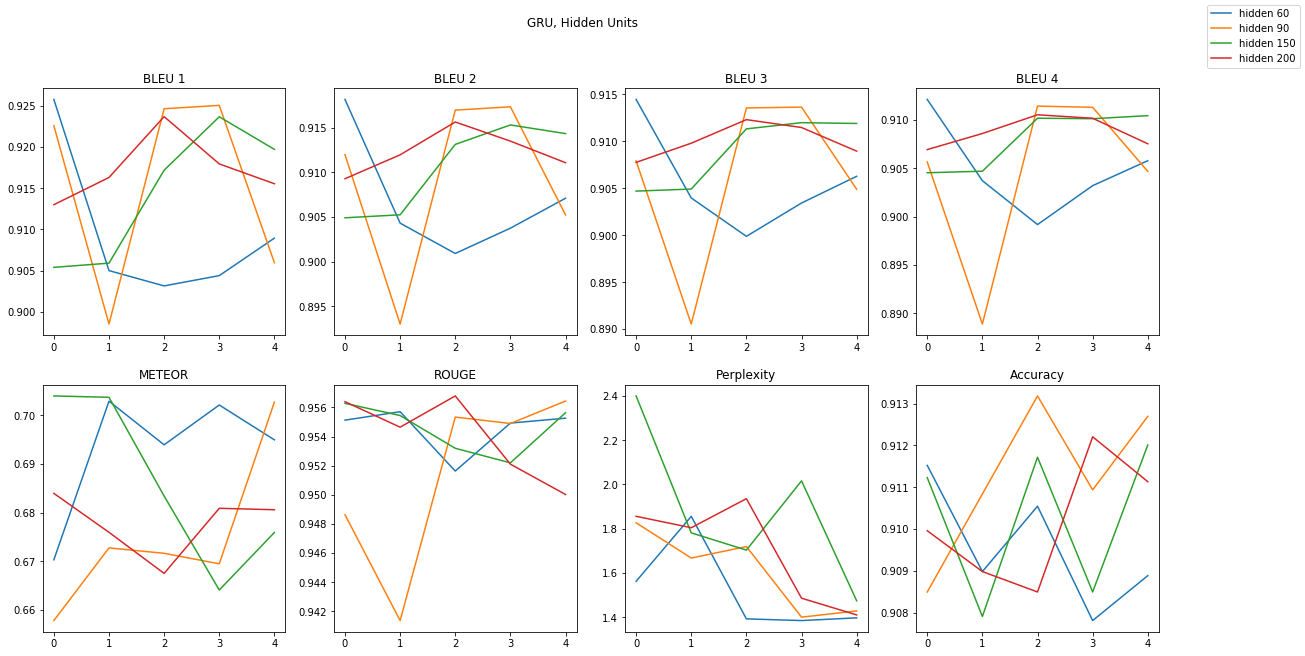

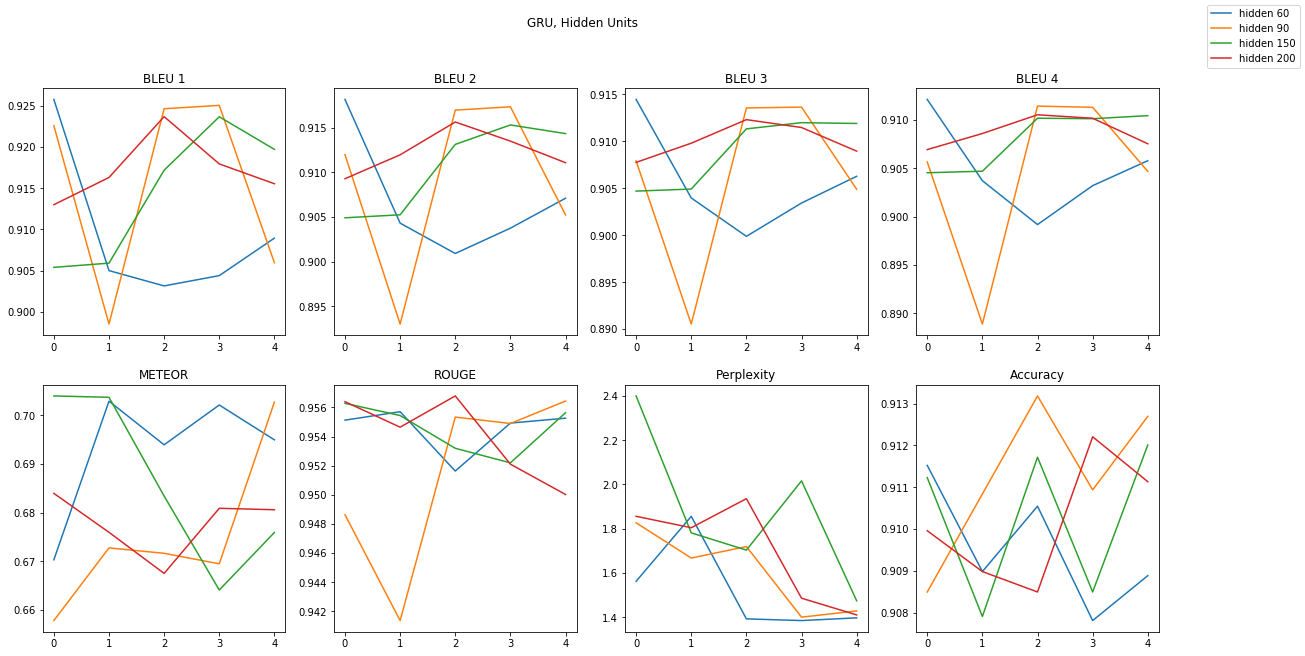

In [115]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['GRU'], ['1'], ['60', '90', '150', '200'], ['0.0'], ['3'], ['0'], ['32']),
              control='hidden',
              title='GRU, Hidden Units')

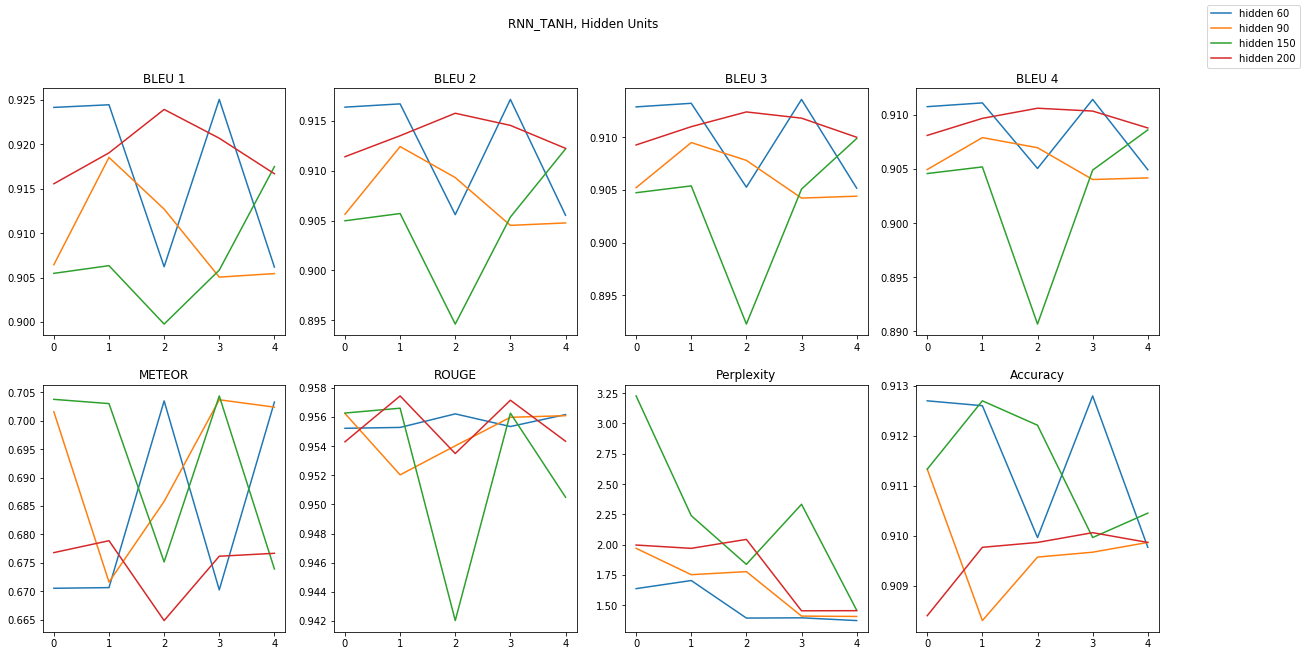

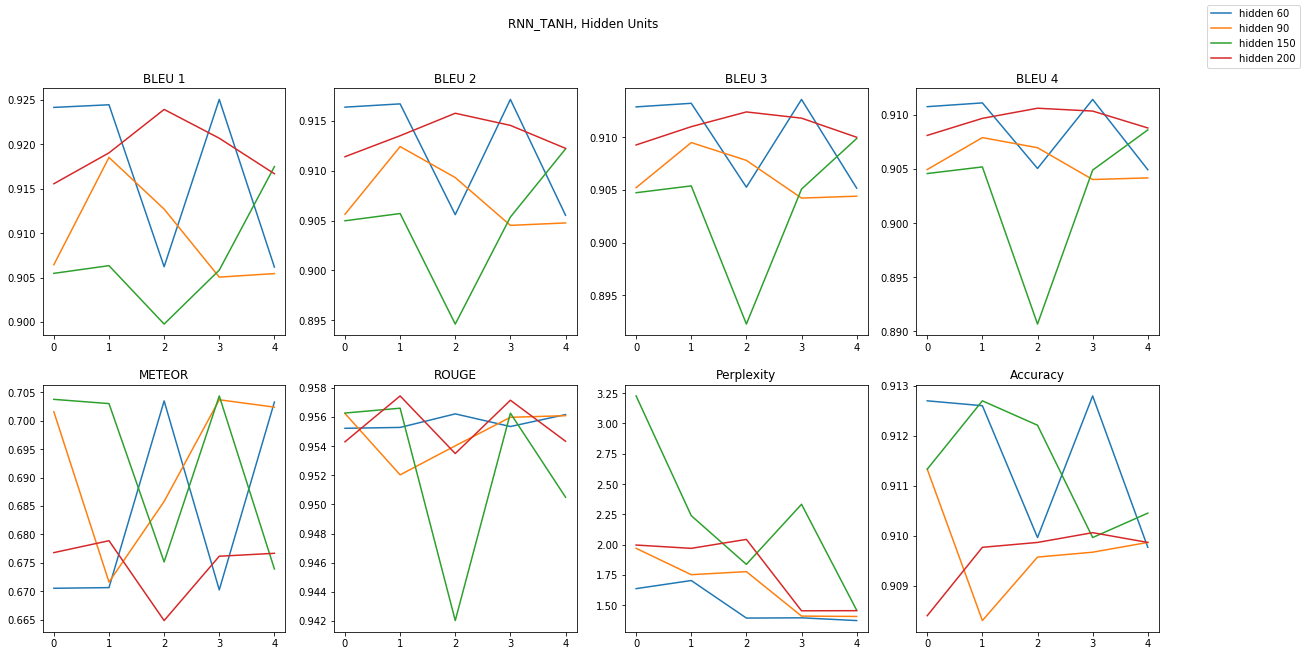

In [116]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['RNN_TANH'], ['1'], ['60', '90', '150', '200'], ['0.0'], ['3'], ['0'], ['32']),
              control='hidden',
              title='RNN_TANH, Hidden Units')

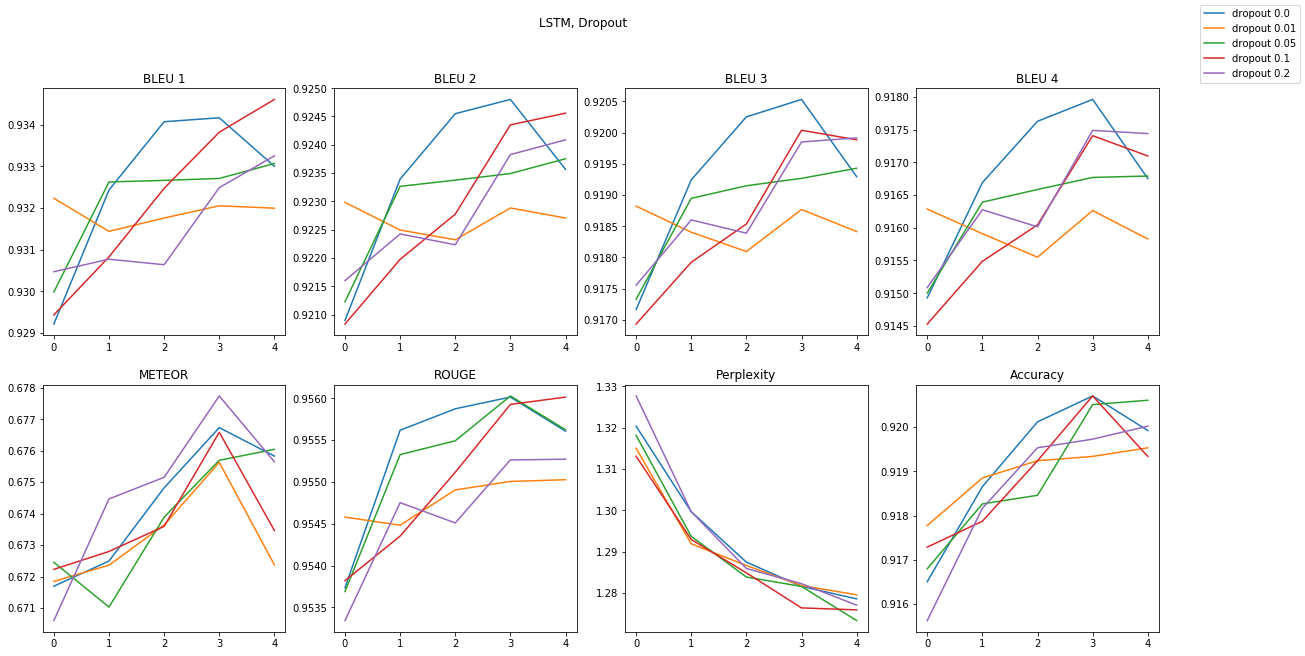

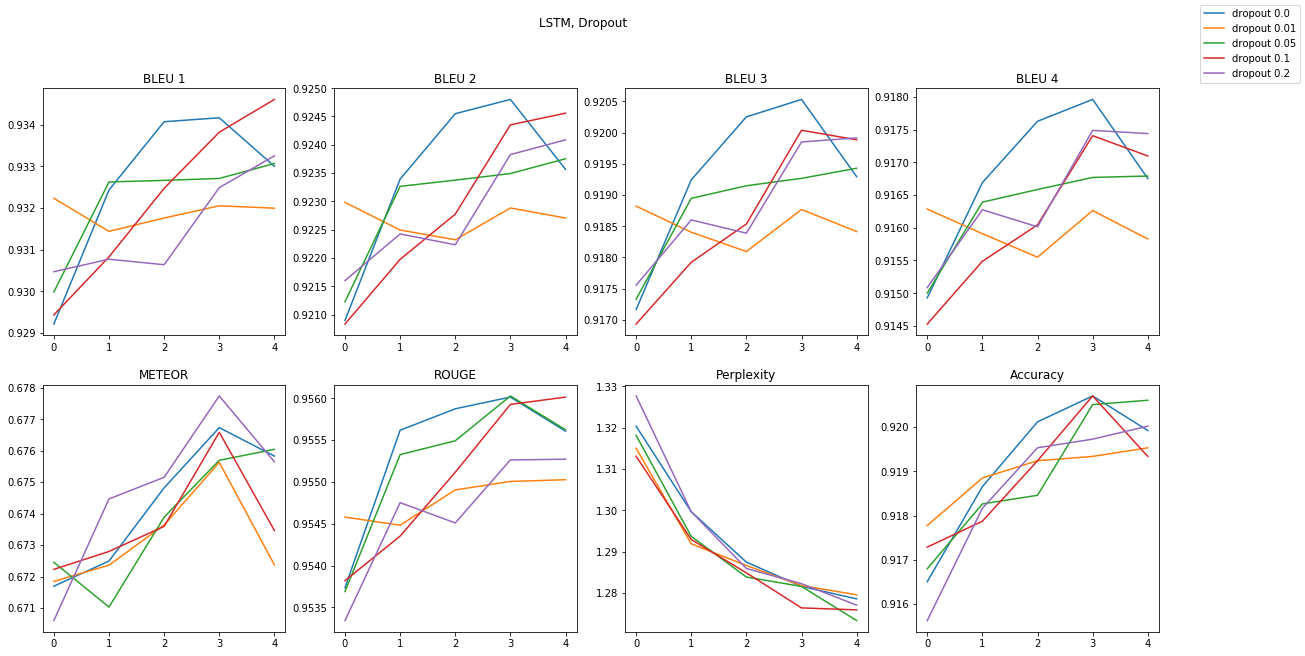

In [117]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['LSTM'], ['2'], ['200'], ['0.0', '0.01', '0.05', '0.1', '0.2'], ['3'], ['0'], ['32']),
              control='dropout',
              title='LSTM, Dropout')

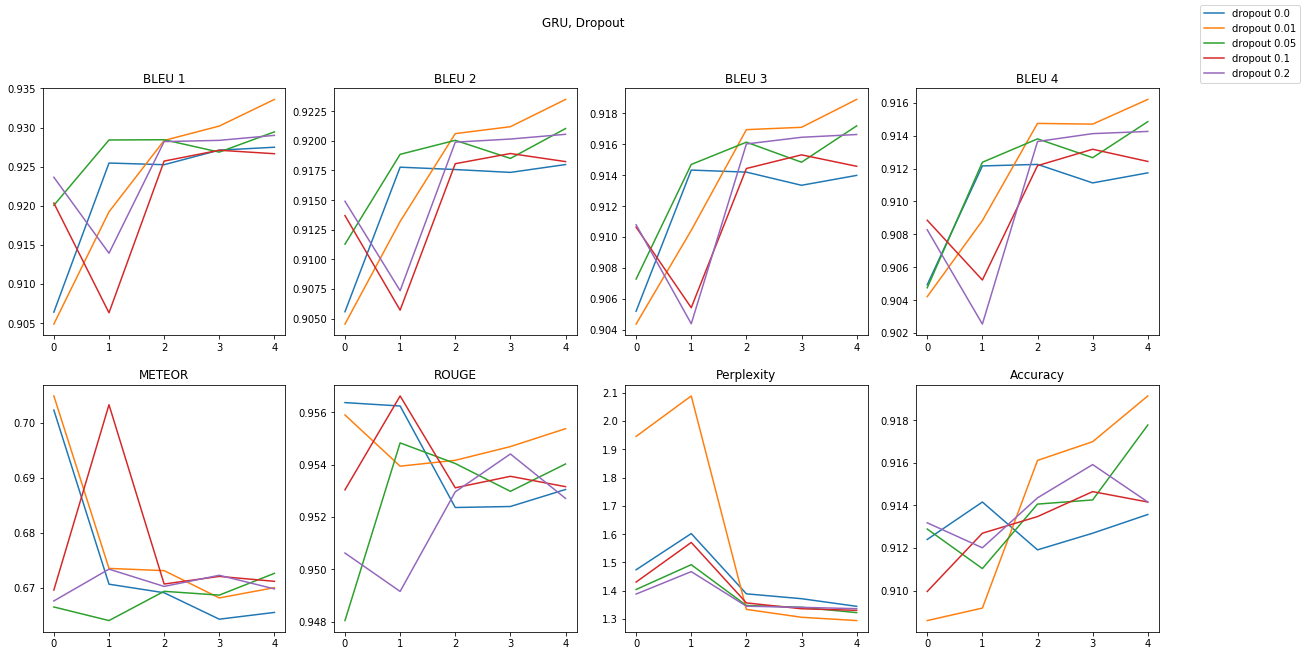

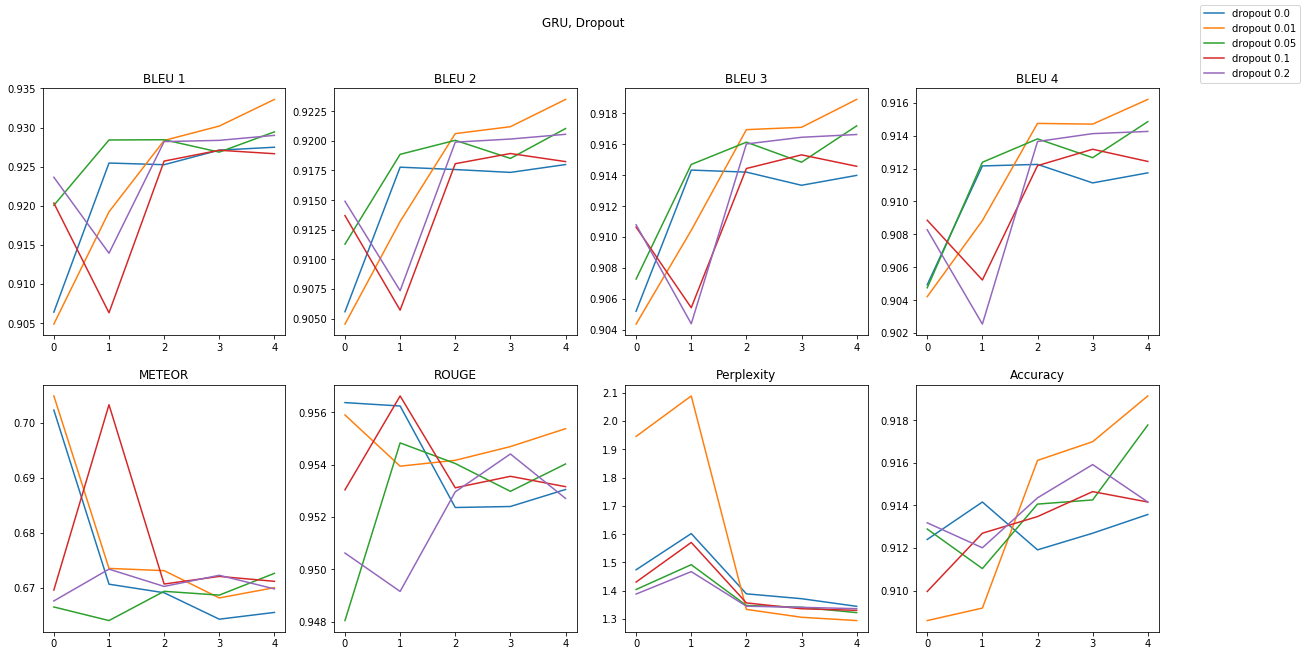

In [118]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['GRU'], ['2'], ['200'], ['0.0', '0.01', '0.05', '0.1', '0.2'], ['3'], ['0'], ['32']),
              control='dropout',
              title='GRU, Dropout')

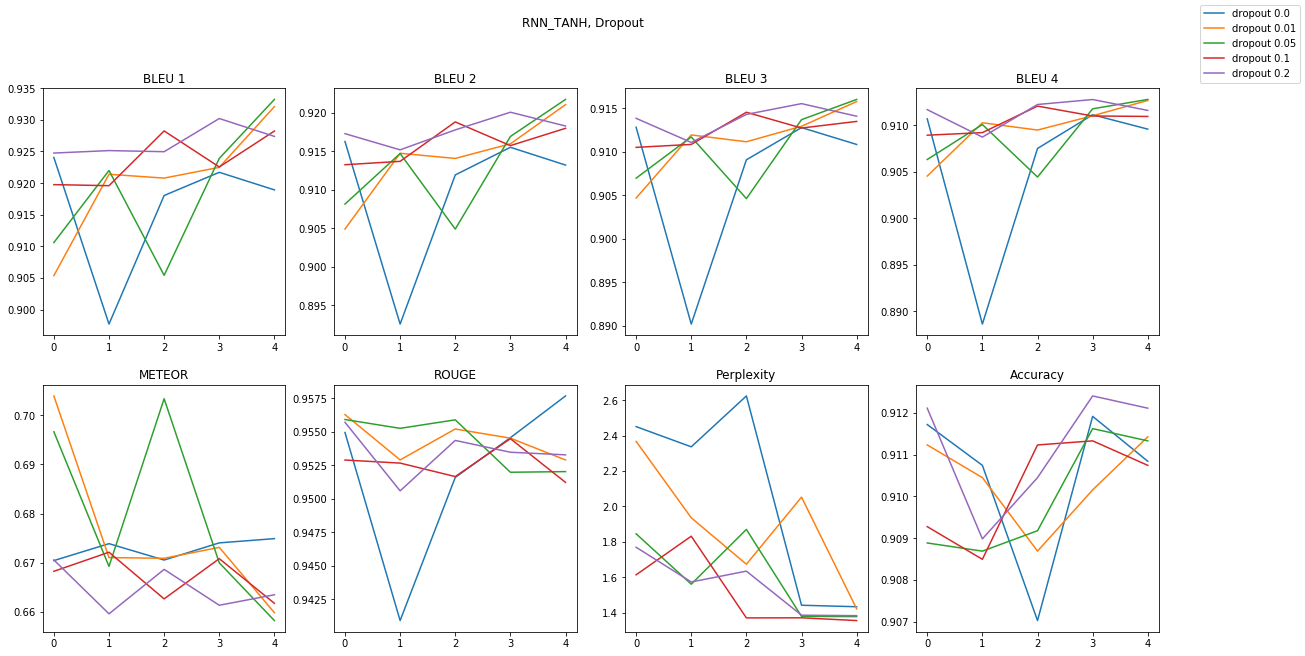

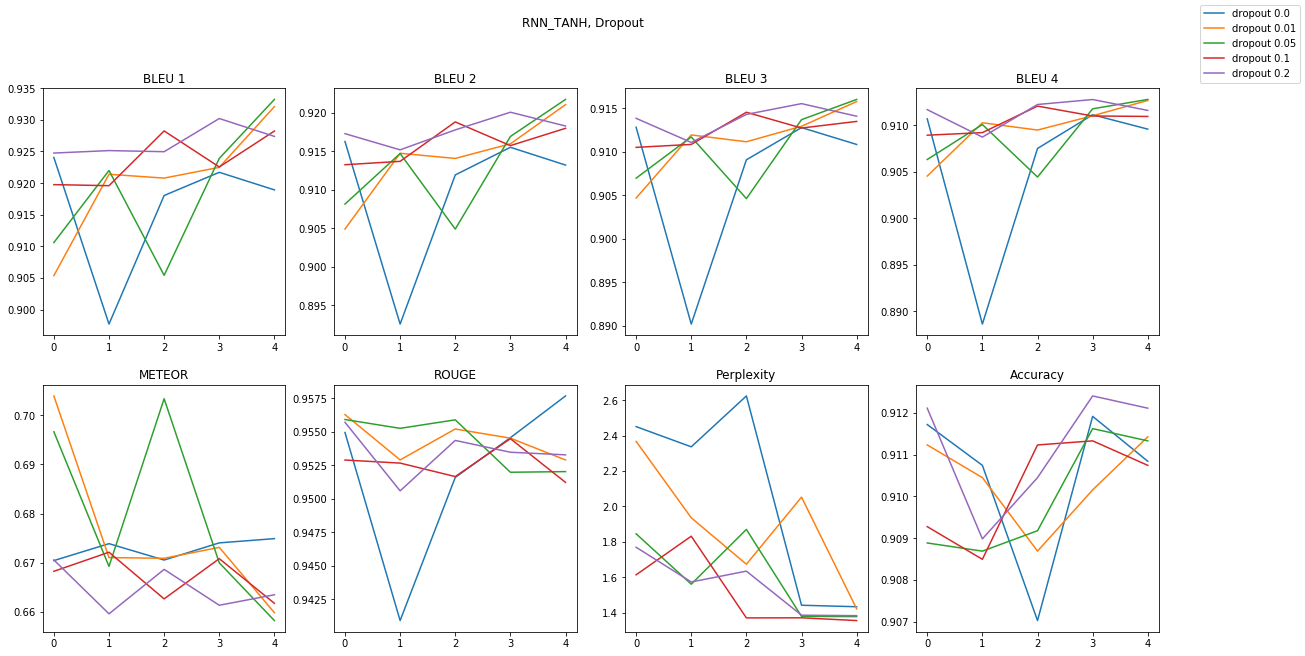

In [119]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['RNN_TANH'], ['2'], ['200'], ['0.0', '0.01', '0.05', '0.1', '0.2'], ['3'], ['0'], ['32']),
              control='dropout',
              title='RNN_TANH, Dropout')

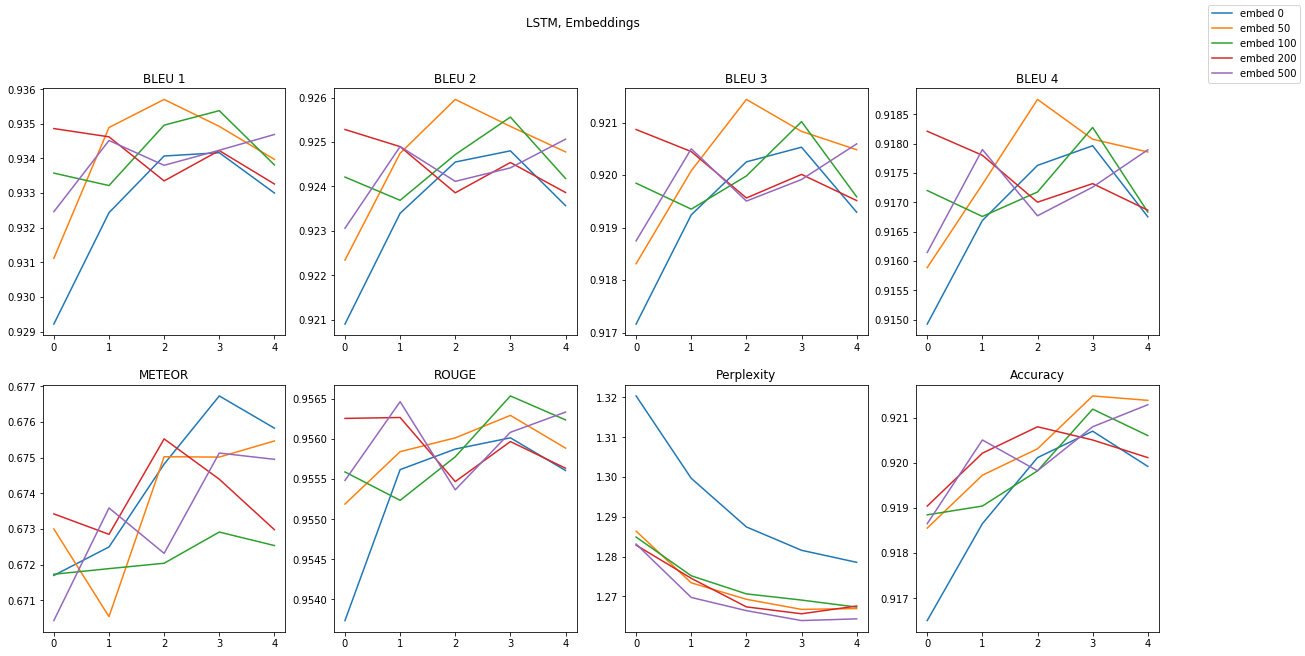

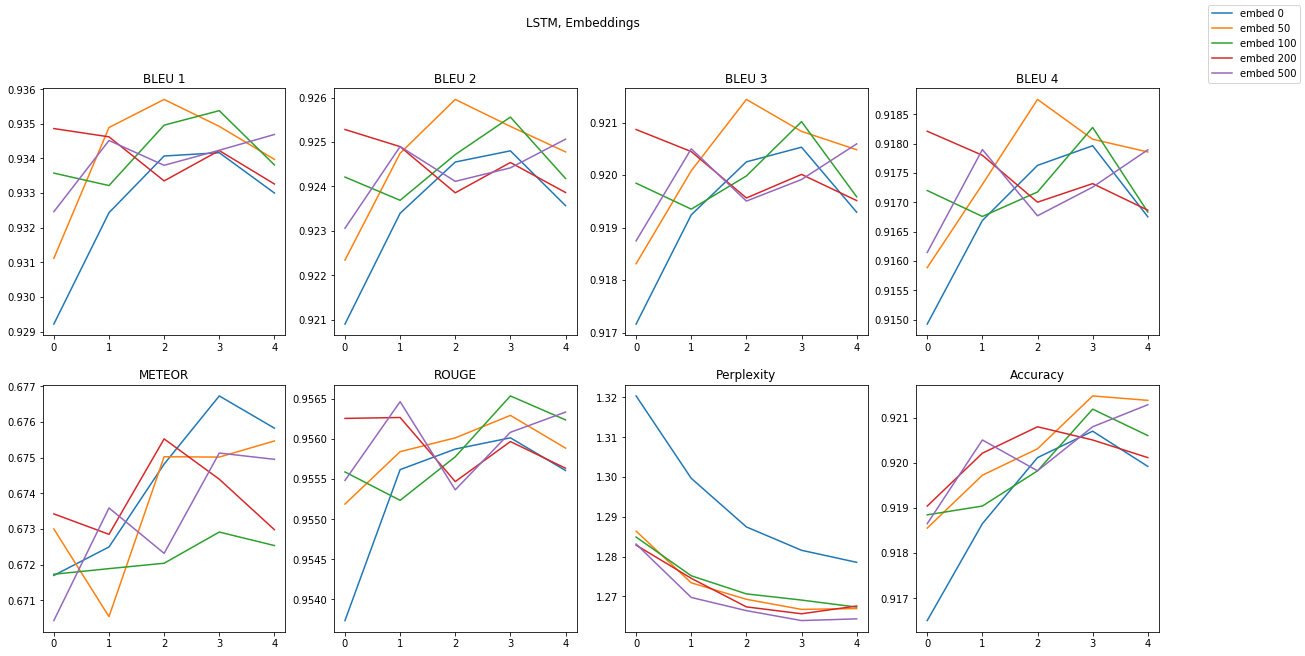

In [120]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['LSTM'], ['2'], ['200'], ['0.0'], ['3'], ['0', '50', '100', '200', '500'], ['32']),
              control='embed',
              title='LSTM, Embeddings')

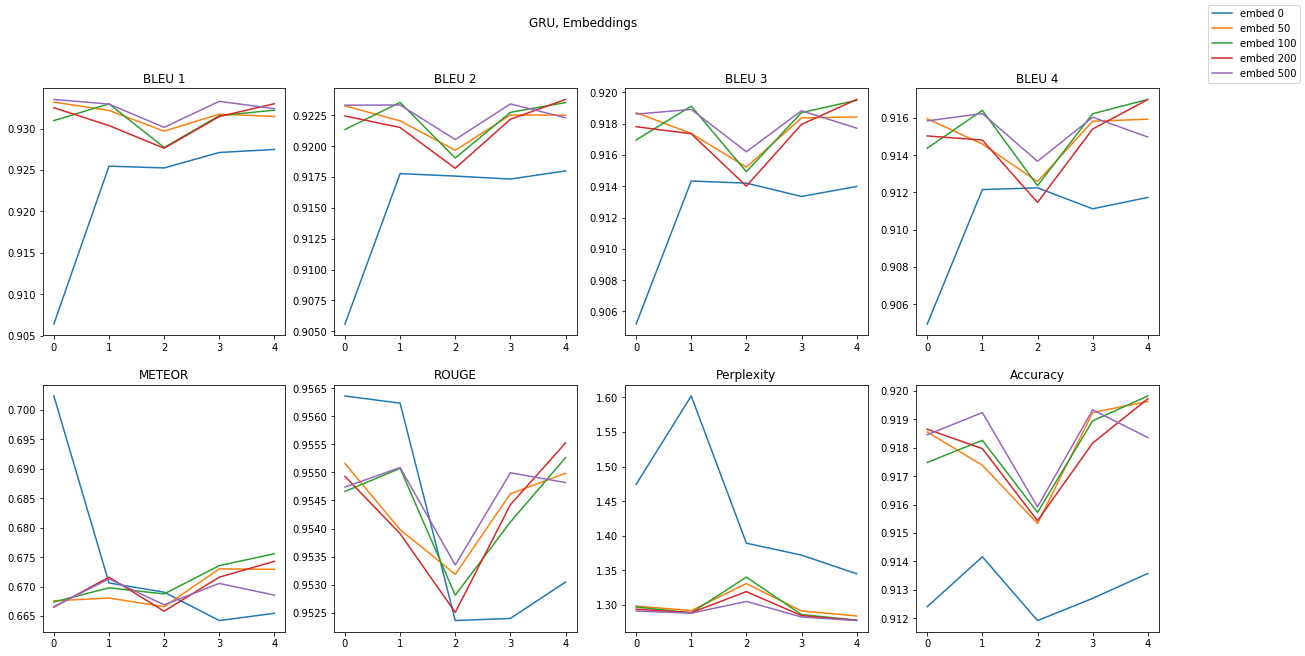

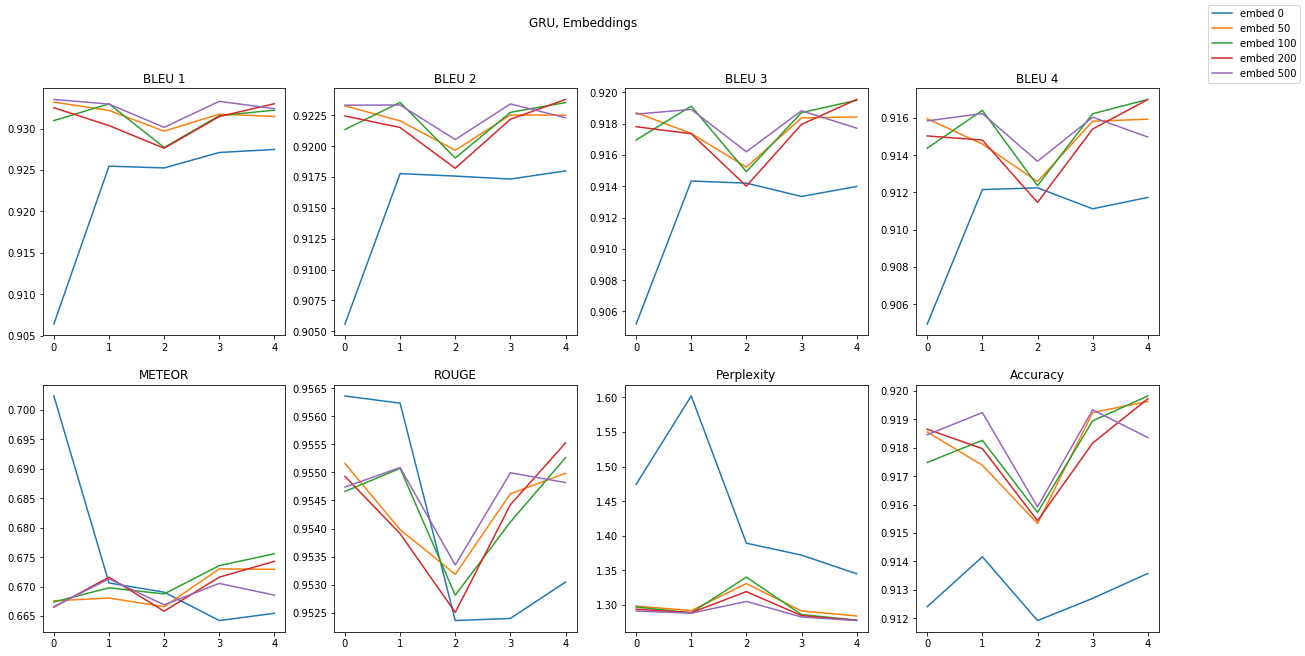

In [121]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['GRU'], ['2'], ['200'], ['0.0'], ['3'], ['0', '50', '100', '200', '500'], ['32']),
              control='embed',
              title='GRU, Embeddings')

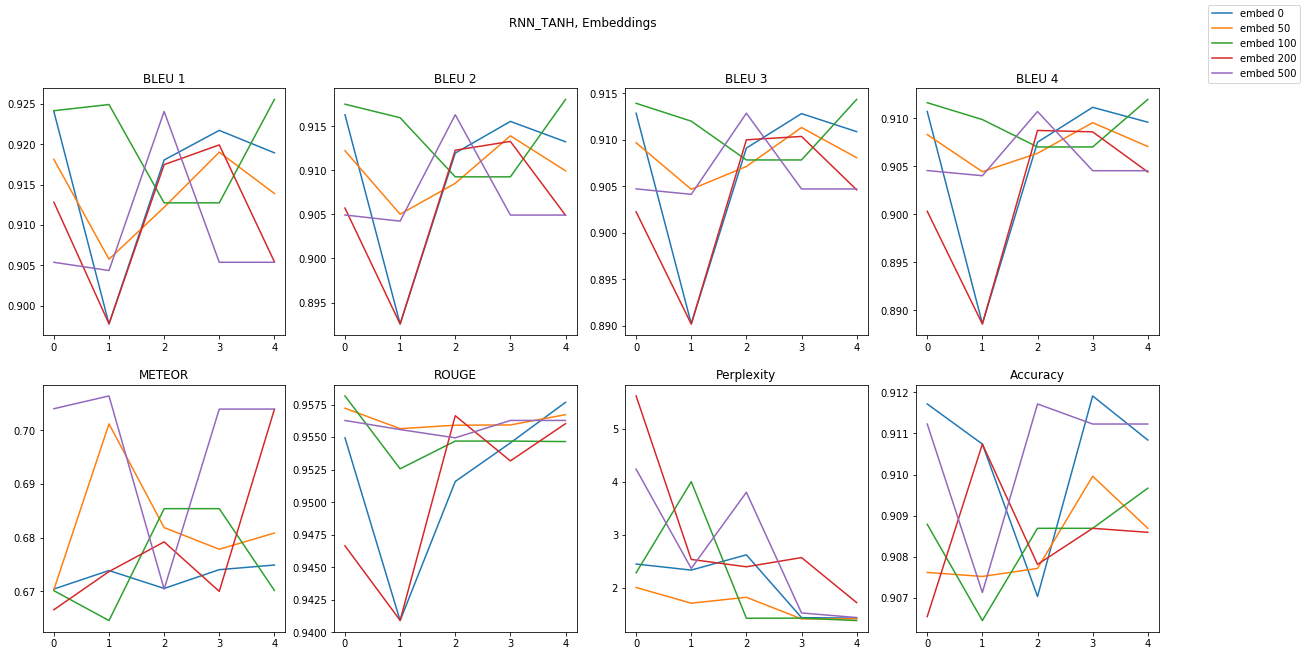

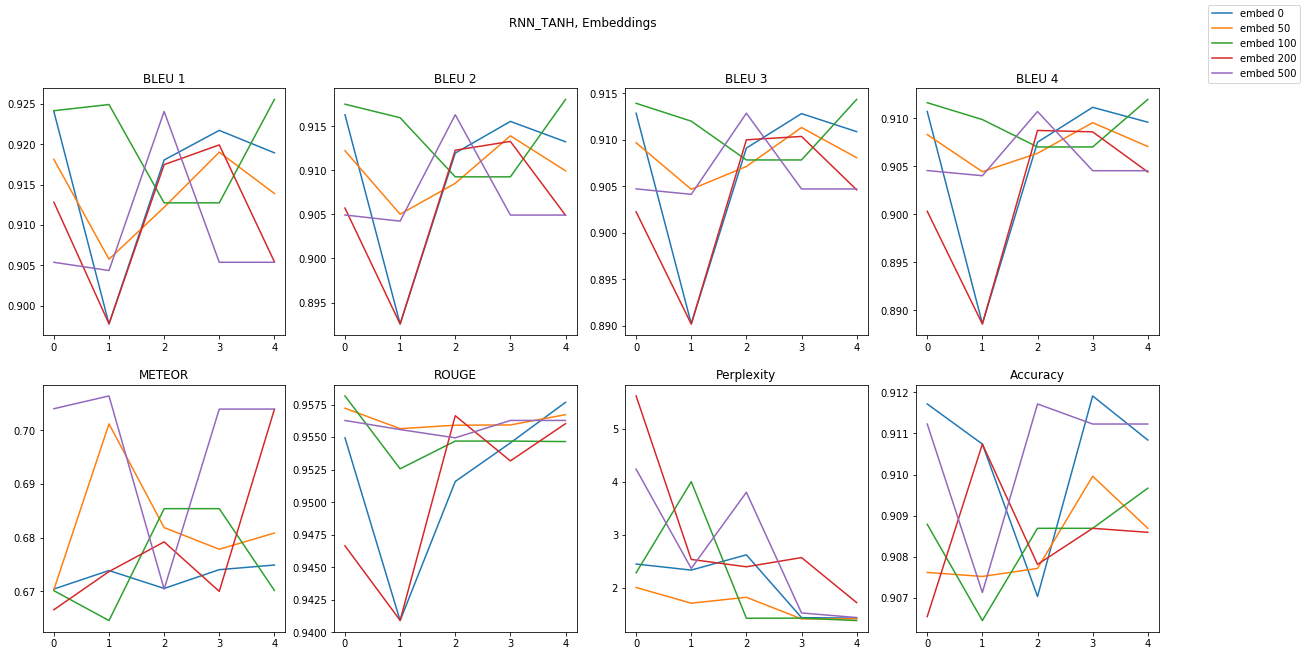

In [122]:
plot_datasets(select_data('statistics_new', ['wikitext-2'], ['RNN_TANH'], ['2'], ['200'], ['0.0'], ['3'], ['0', '50', '100', '200', '500'], ['32']),
              control='embed',
              title='RNN_TANH, Embeddings')

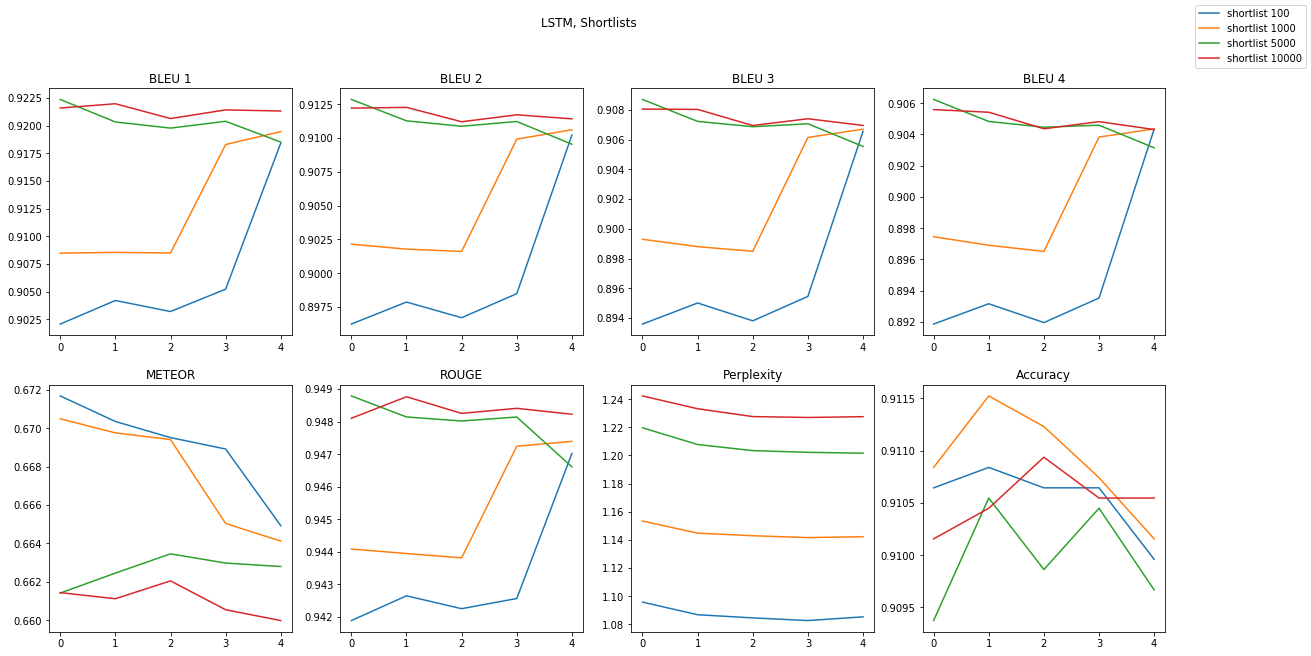

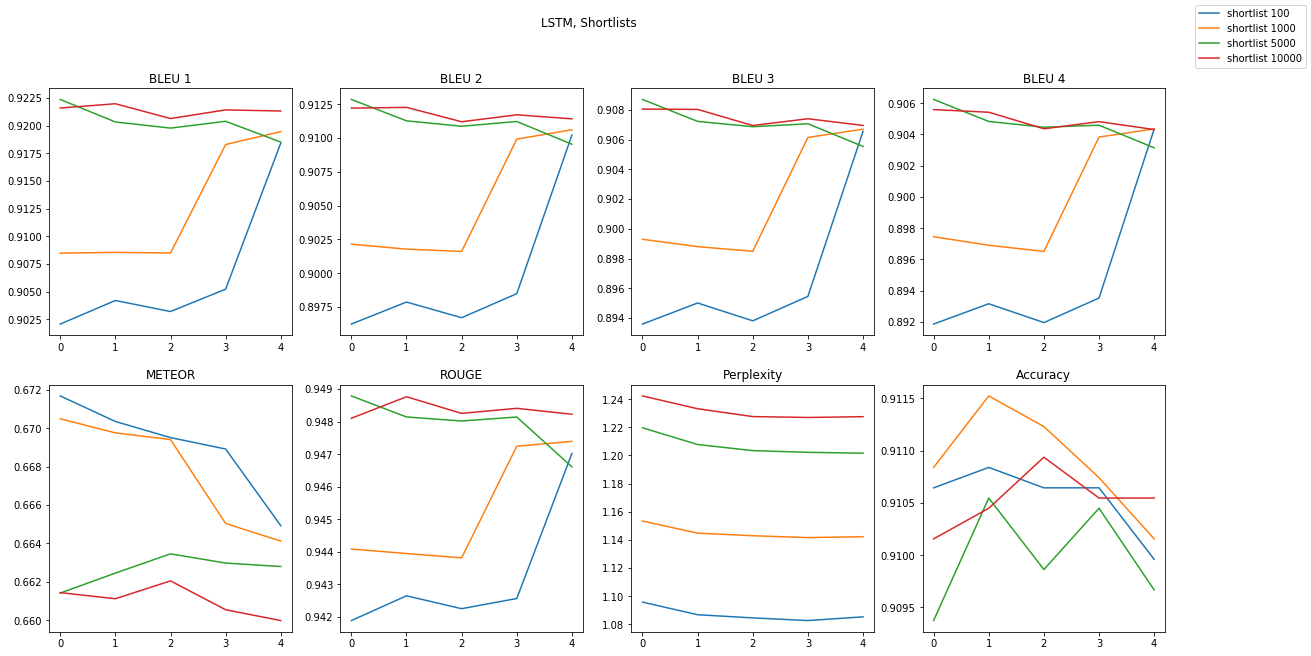

In [123]:
plot_datasets(select_data('statistics_shortlists', ['wikitext-2'], ['LSTM'], ['2'], ['200'], ['0.0'], ['3'], ['500'], ['32'], ['100', '1000', '5000', '10000']),
              control='shortlist',
              title='LSTM, Shortlists')

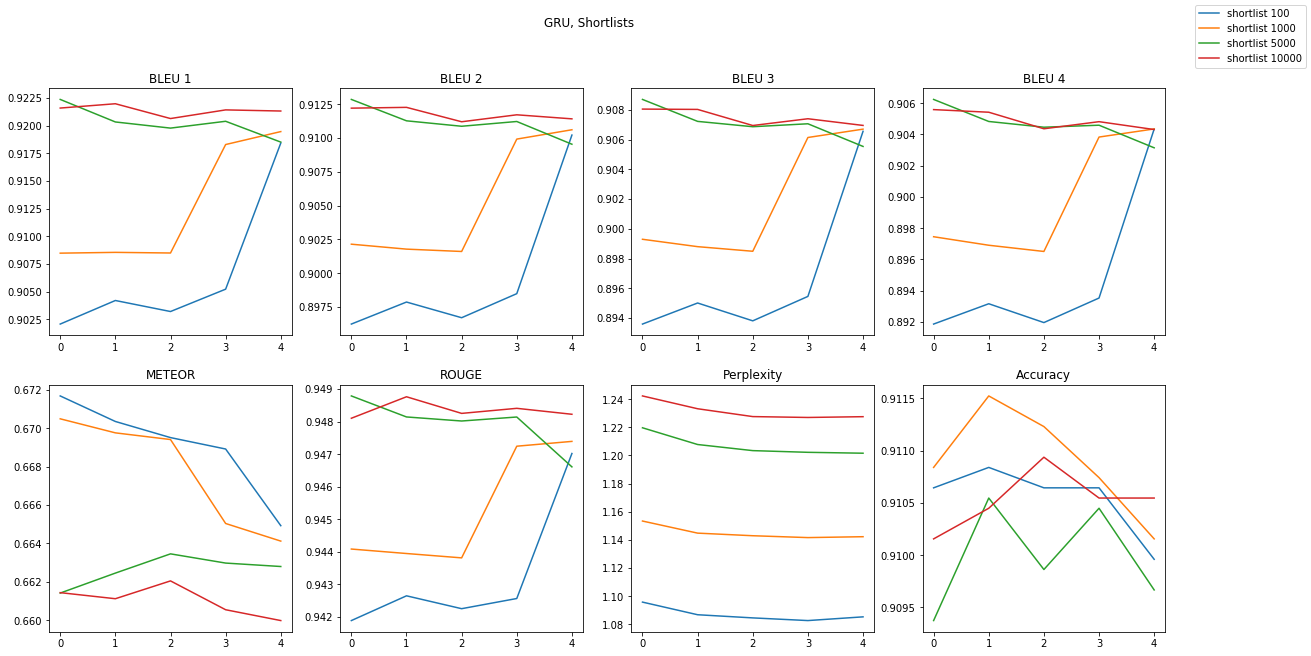

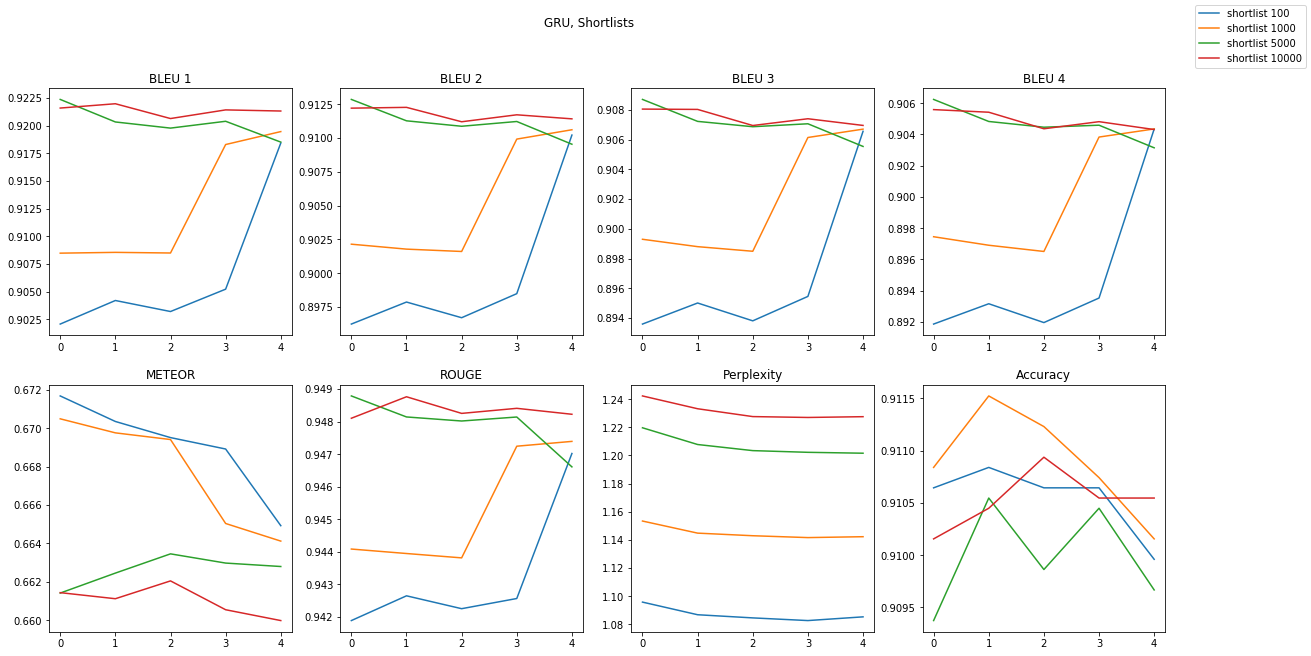

In [124]:
plot_datasets(select_data('statistics_shortlists', ['wikitext-2'], ['LSTM'], ['2'], ['200'], ['0.0'], ['3'], ['500'], ['32'], ['100', '1000', '5000', '10000']),
              control='shortlist',
              title='GRU, Shortlists')

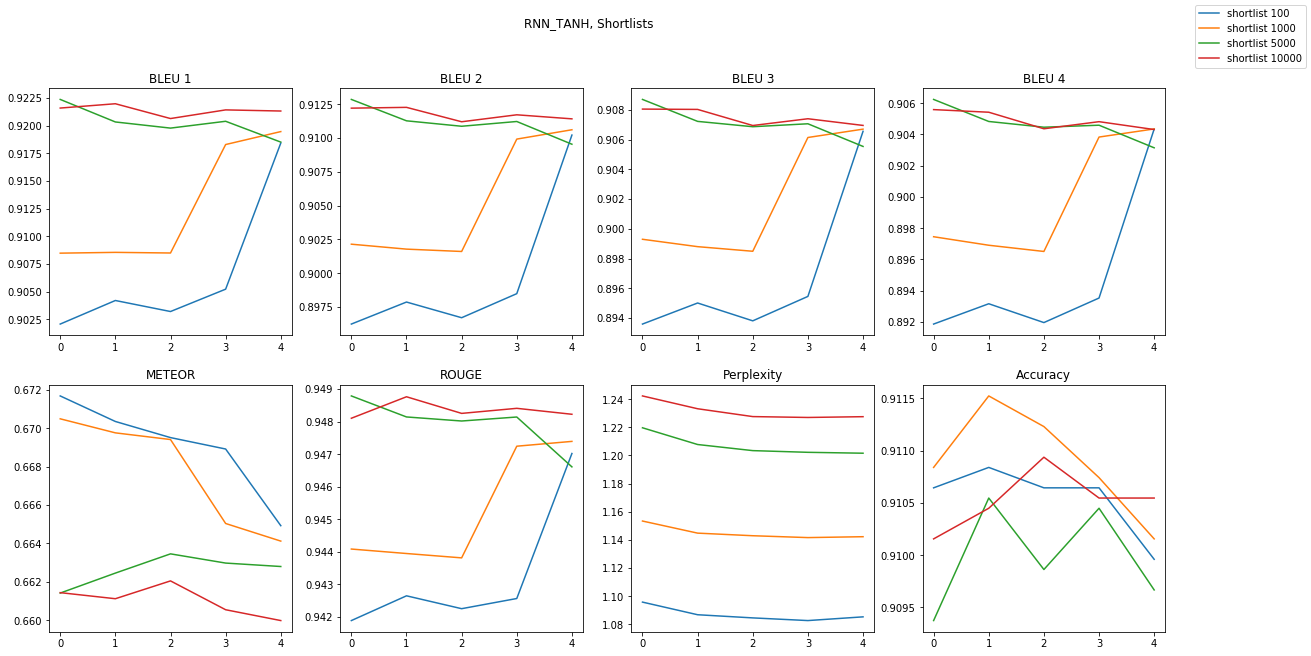

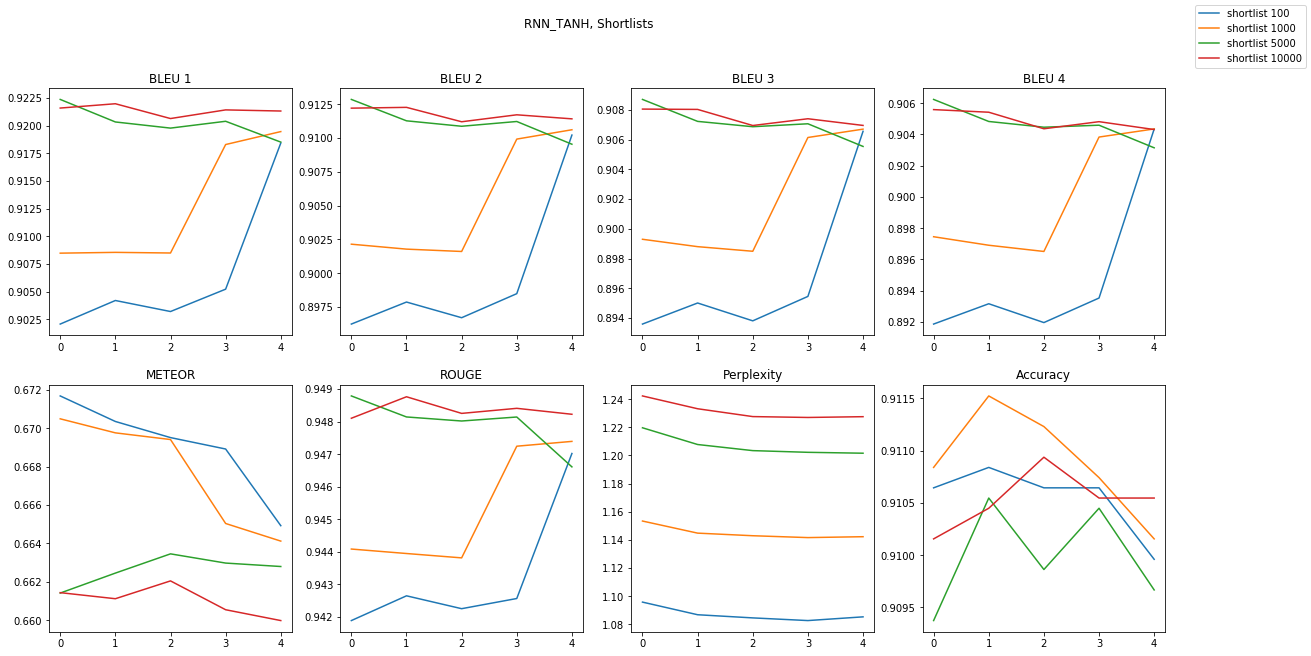

In [125]:
plot_datasets(select_data('statistics_shortlists', ['wikitext-2'], ['LSTM'], ['2'], ['200'], ['0.0'], ['3'], ['500'], ['32'], ['100', '1000', '5000', '10000']),
              control='shortlist',
              title='RNN_TANH, Shortlists')

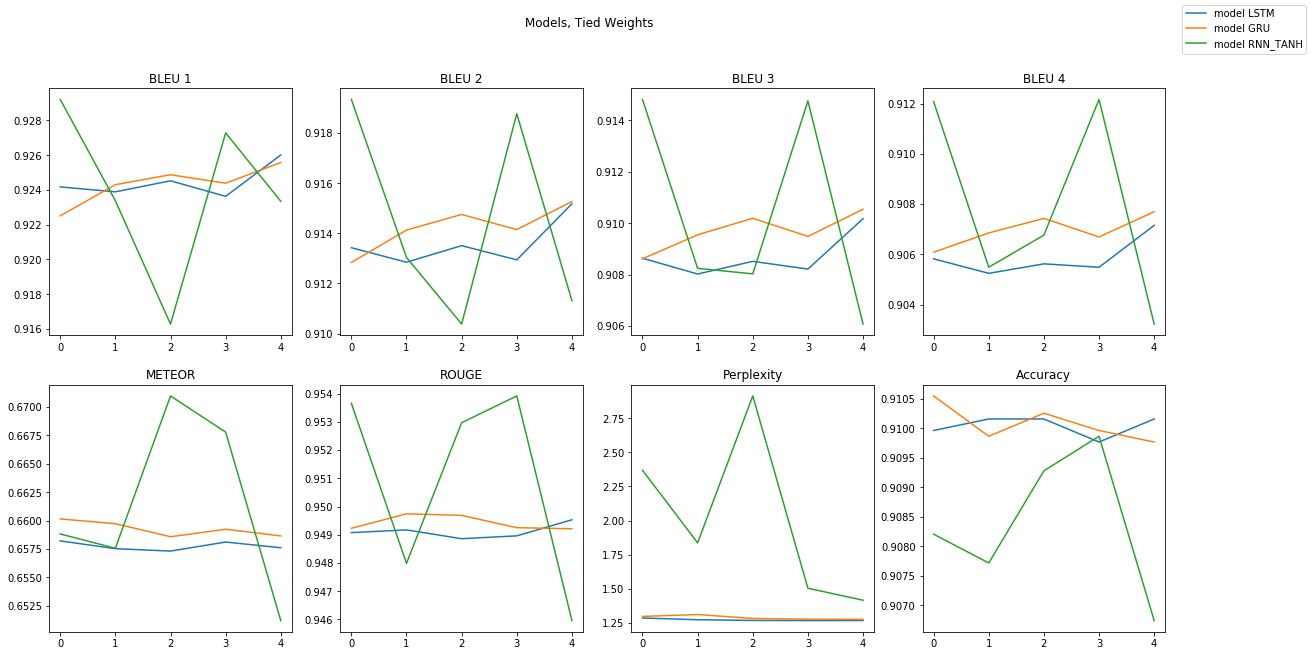

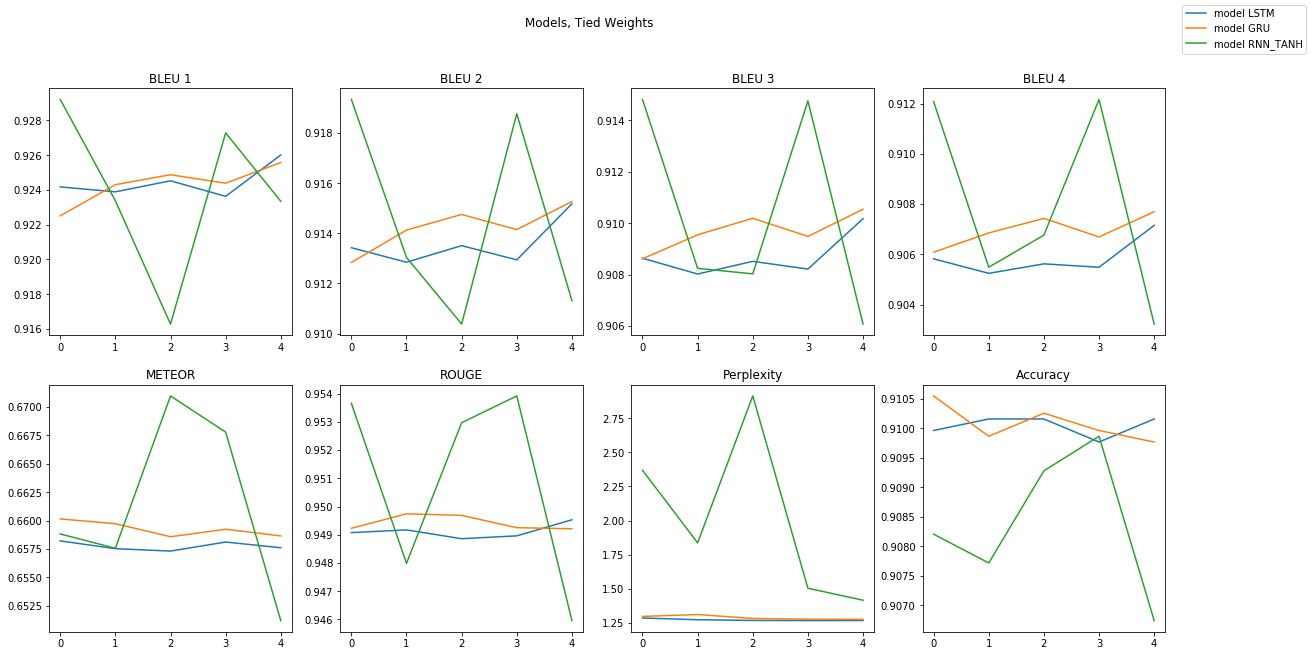

In [126]:
plot_datasets(select_data('statistics_tied_weights', ['wikitext-2'], ['LSTM', 'GRU', 'RNN_TANH'], ['2'], ['200'], ['0.0'], ['3'], ['200'], ['32'], ['-1']),
              control='model',
              title='Models, Tied Weights')

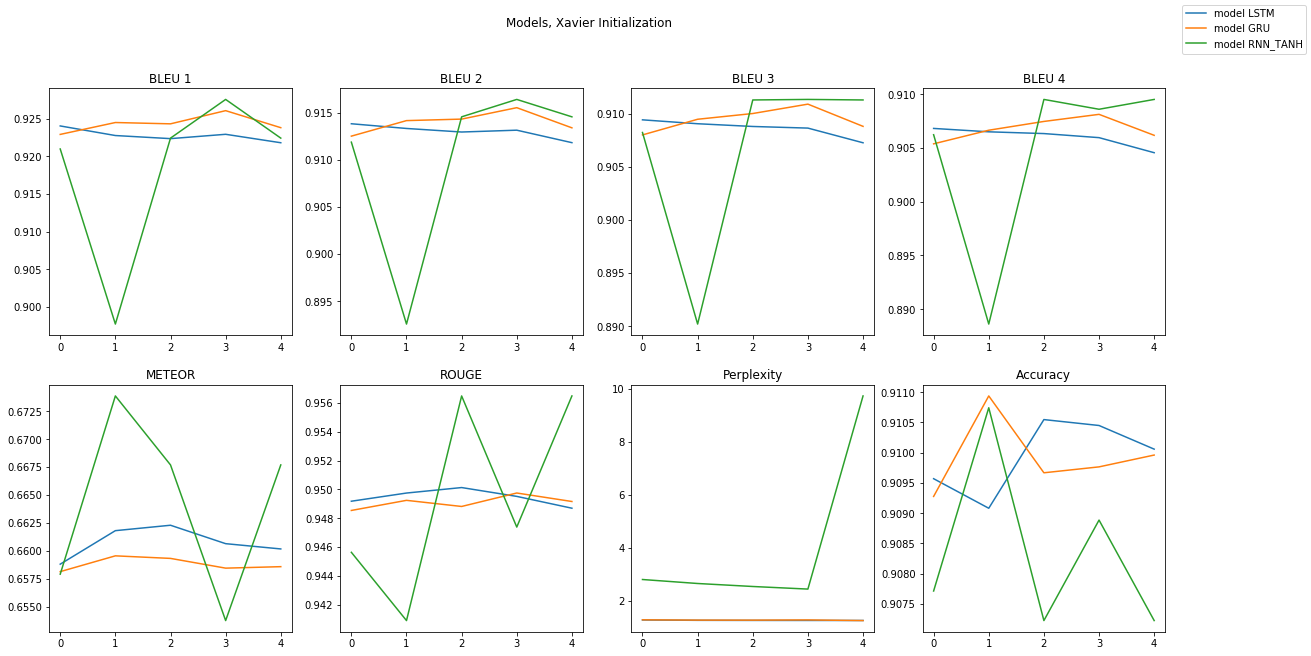

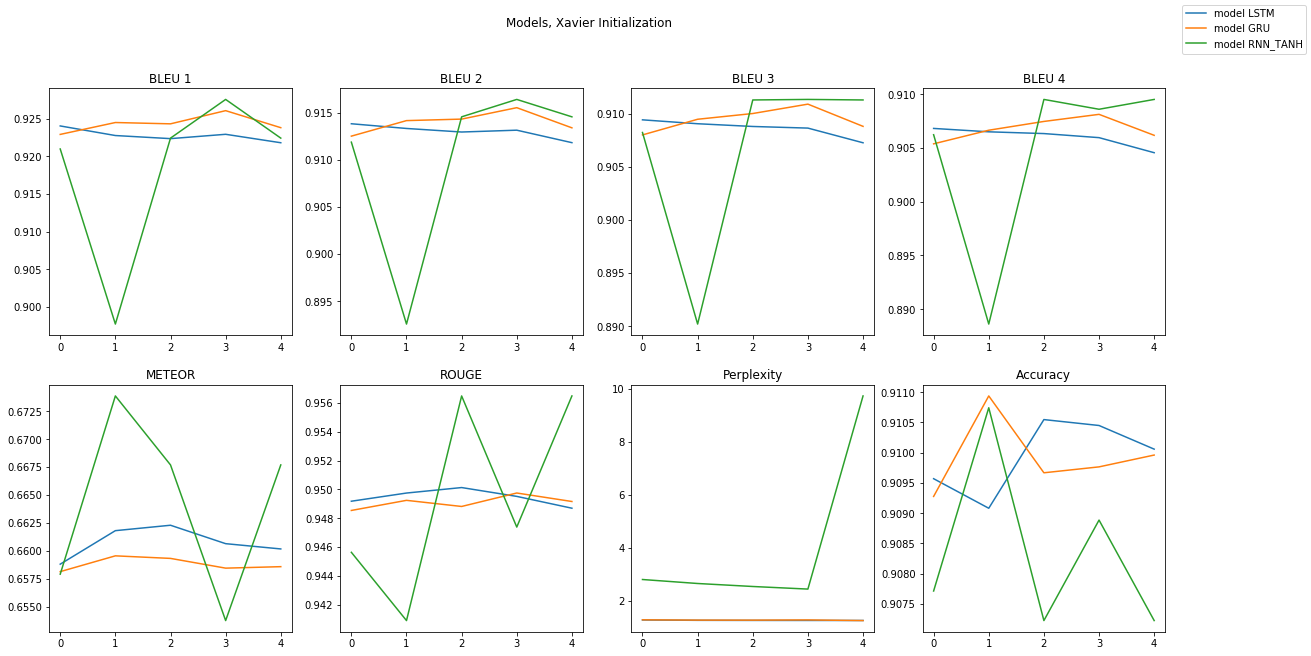

In [127]:
plot_datasets(select_data('statistics_xavier_init', ['wikitext-2'], ['LSTM', 'GRU', 'RNN_TANH'], ['2'], ['200'], ['0.0'], ['3'], ['500'], ['32'], ['-1']),
              control='model',
              title='Models, Xavier Initialization')

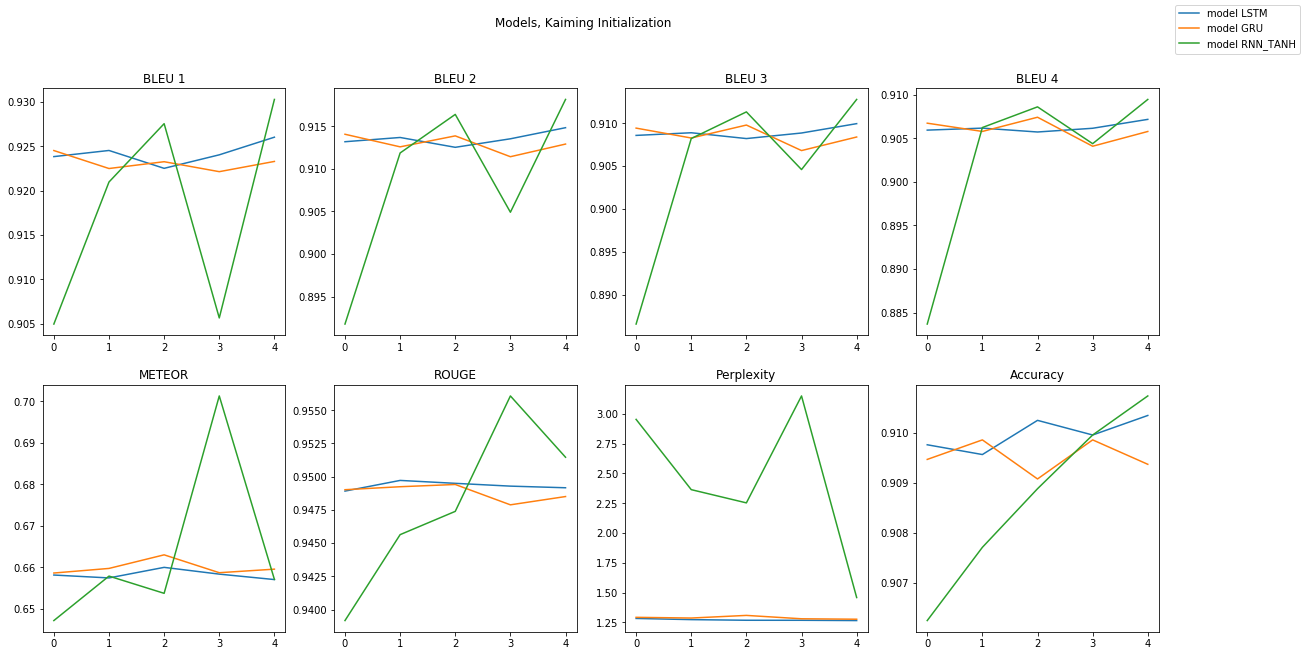

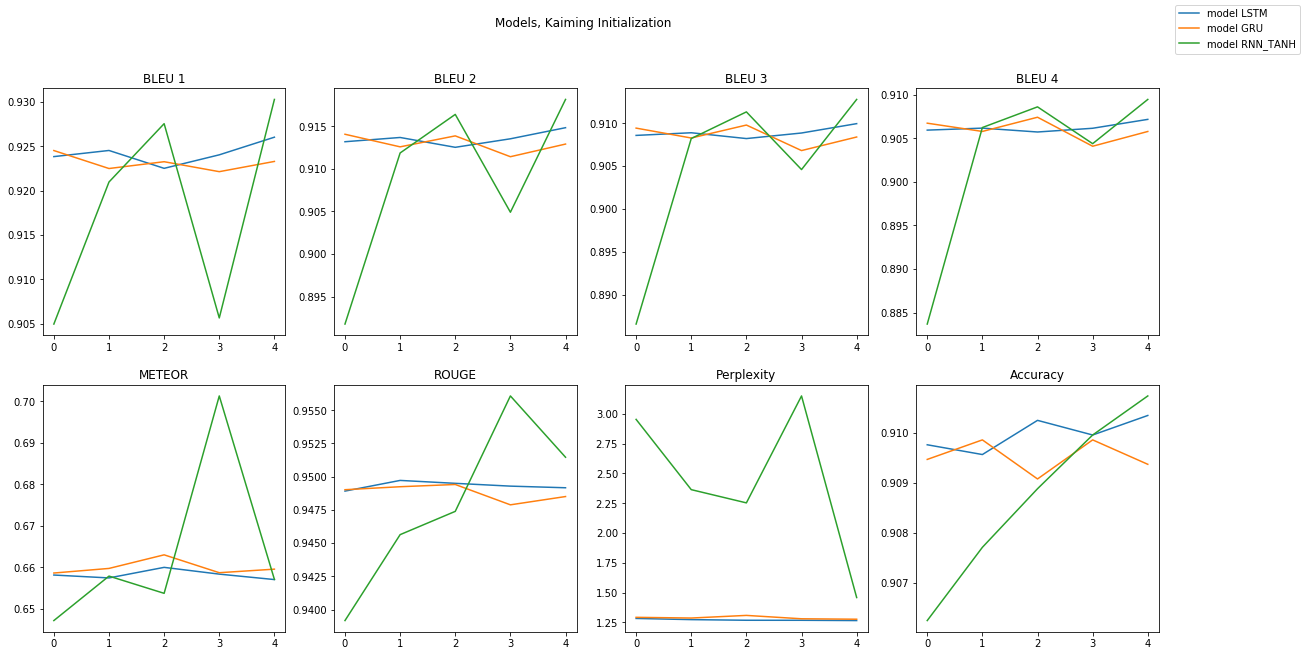

In [128]:
plot_datasets(select_data('statistics_kaiming', ['wikitext-2'], ['LSTM', 'GRU', 'RNN_TANH'], ['2'], ['200'], ['0.0'], ['3'], ['500'], ['32'], ['-1']),
              control='model',
              title='Models, Kaiming Initialization')